In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
from pathlib import Path

if "workding_dir" not in locals():
    try:
        from google.colab import drive
        drive.mount('/content/drive')
        workding_dir = "/content/drive/MyDrive/logical-reasoning/"
    except ModuleNotFoundError:
        workding_dir = str(Path.cwd().parent)

In [32]:
import os
import sys

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/projects/logical-reasoning


In [33]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/projects/logical-reasoning/.env


True

In [34]:
from llm_toolkit.logical_reasoning_utils import *

In [35]:
model_name = "Qwen2.5-0.5B-Instruct"
result_csv = f"data/{model_name}_results.csv"
metrics_csv = f"data/{model_name}_metrics.csv"

In [36]:
import pandas as pd

df = pd.read_csv(result_csv)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                                                      Non-Null Count  Dtype 
---  ------                                                      --------------  ----- 
 0   text                                                        3000 non-null   object
 1   label                                                       3000 non-null   object
 2   title                                                       3000 non-null   object
 3   puzzle                                                      3000 non-null   object
 4   truth                                                       3000 non-null   object
 5   Qwen/Qwen2.5-0.5B-Instruct/shots-00                         3000 non-null   object
 6   Qwen/Qwen2.5-0.5B-Instruct/shots-05                         3000 non-null   object
 7   Qwen/Qwen2.5-0.5B-Instruct/shots-10                         3000 non-null   object
 8   Qwen/Qwe

In [37]:
df.columns.to_list()

['text',
 'label',
 'title',
 'puzzle',
 'truth',
 'Qwen/Qwen2.5-0.5B-Instruct/shots-00',
 'Qwen/Qwen2.5-0.5B-Instruct/shots-05',
 'Qwen/Qwen2.5-0.5B-Instruct/shots-10',
 'Qwen/Qwen2.5-0.5B-Instruct/shots-20',
 'Qwen/Qwen2.5-0.5B-Instruct/shots-30',
 'Qwen/Qwen2.5-0.5B-Instruct_torch.float16_lf',
 'Qwen/Qwen2.5-0.5B-Instruct/checkpoint-35_torch.float16_lf',
 'Qwen/Qwen2.5-0.5B-Instruct/checkpoint-70_torch.float16_lf',
 'Qwen/Qwen2.5-0.5B-Instruct/checkpoint-105_torch.float16_lf',
 'Qwen/Qwen2.5-0.5B-Instruct/checkpoint-140_torch.float16_lf',
 'Qwen/Qwen2.5-0.5B-Instruct/checkpoint-175_torch.float16_lf',
 'Qwen/Qwen2.5-0.5B-Instruct/checkpoint-210_torch.float16_lf',
 'Qwen/Qwen2.5-0.5B-Instruct/checkpoint-245_torch.float16_lf',
 'Qwen/Qwen2.5-0.5B-Instruct/checkpoint-280_torch.float16_lf',
 'Qwen/Qwen2.5-0.5B-Instruct/checkpoint-315_torch.float16_lf',
 'Qwen/Qwen2.5-0.5B-Instruct/checkpoint-350_torch.float16_lf',
 'Qwen/Qwen2.5-0.5B-Instruct/shots-40',
 'Qwen/Qwen2.5-0.5B-Instruct/shots

In [38]:
perf_df = get_metrics_df(df)
perf_df

columns: ['Qwen/Qwen2.5-0.5B-Instruct_torch.float16_lf', 'Qwen/Qwen2.5-0.5B-Instruct/checkpoint-35_torch.float16_lf', 'Qwen/Qwen2.5-0.5B-Instruct/checkpoint-70_torch.float16_lf', 'Qwen/Qwen2.5-0.5B-Instruct/checkpoint-105_torch.float16_lf', 'Qwen/Qwen2.5-0.5B-Instruct/checkpoint-140_torch.float16_lf', 'Qwen/Qwen2.5-0.5B-Instruct/checkpoint-175_torch.float16_lf', 'Qwen/Qwen2.5-0.5B-Instruct/checkpoint-210_torch.float16_lf', 'Qwen/Qwen2.5-0.5B-Instruct/checkpoint-245_torch.float16_lf', 'Qwen/Qwen2.5-0.5B-Instruct/checkpoint-280_torch.float16_lf', 'Qwen/Qwen2.5-0.5B-Instruct/checkpoint-315_torch.float16_lf', 'Qwen/Qwen2.5-0.5B-Instruct/checkpoint-350_torch.float16_lf']


/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:478: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perf_df = pd.concat(


epoch                  model  \
0     0.0  Qwen2.5-0.5B-Instruct   
1     0.2  Qwen2.5-0.5B-Instruct   
2     0.4  Qwen2.5-0.5B-Instruct   
3     0.6  Qwen2.5-0.5B-Instruct   
4     0.8  Qwen2.5-0.5B-Instruct   
5     1.0  Qwen2.5-0.5B-Instruct   
6     1.2  Qwen2.5-0.5B-Instruct   
7     1.4  Qwen2.5-0.5B-Instruct   
8     1.6  Qwen2.5-0.5B-Instruct   
9     1.8  Qwen2.5-0.5B-Instruct   
10    2.0  Qwen2.5-0.5B-Instruct   

                                                  run  accuracy  precision  \
0         Qwen/Qwen2.5-0.5B-Instruct_torch.float16_lf  0.443000   0.549053   
1   Qwen/Qwen2.5-0.5B-Instruct/checkpoint-35_torch...  0.525000   0.581922   
2   Qwen/Qwen2.5-0.5B-Instruct/checkpoint-70_torch...  0.540000   0.644526   
3   Qwen/Qwen2.5-0.5B-Instruct/checkpoint-105_torc...  0.437667   0.656576   
4   Qwen/Qwen2.5-0.5B-Instruct/checkpoint-140_torc...  0.499333   0.651309   
5   Qwen/Qwen2.5-0.5B-Instruct/checkpoint-175_torc...  0.552333   0.662208   
6   Qwen/Qwen2.5-0.5B-Instruct/checkpoint-210_torc...  0.540333   0.643196   
7   Qwen/Qwen2.5-0.5B-Instruct/checkpoint-245_torc...  0.584333   0.655981   
8   Qwen/Qwen2.5-0.5B-Instruct/checkpoint-280_torc...  0.521667   0.660468   
9   Qwen/Qwen2.5-0.5B-Instruct/checkpoint-315_torc...  0.524000   0.667344   
10  Qwen/Qwen2.5-0.5B-Instruct/checkpoint-350_torc...  0.507000   0.659734   

      recall        f1  ratio_valid_classifications  
0   0.443000  0.431782                        0.594  
1   0.525000  0.458668                        1.000  
2   0.540000  0.529302                        1.000  
3   0.437667  0.491677                        1.000  
4   0.499333  0.499131                        1.000  
5   0.552333  0.562728                        1.000  
6   0.540333  0.559842                        1.000  
7   0.584333  0.608677                        1.000  
8   0.521667  0.561545                        1.000  
9   0.524000  0.560746                        1.000  
10  0.507000  0.549228                        1.000

0.0: Qwen/Qwen2.5-0.5B-Instruct_torch.float16_lf
0.2: Qwen/Qwen2.5-0.5B-Instruct/checkpoint-35_torch.float16_lf
0.4: Qwen/Qwen2.5-0.5B-Instruct/checkpoint-70_torch.float16_lf
0.6: Qwen/Qwen2.5-0.5B-Instruct/checkpoint-105_torch.float16_lf
0.8: Qwen/Qwen2.5-0.5B-Instruct/checkpoint-140_torch.float16_lf
1.0: Qwen/Qwen2.5-0.5B-Instruct/checkpoint-175_torch.float16_lf
1.2: Qwen/Qwen2.5-0.5B-Instruct/checkpoint-210_torch.float16_lf
1.4: Qwen/Qwen2.5-0.5B-Instruct/checkpoint-245_torch.float16_lf
1.6: Qwen/Qwen2.5-0.5B-Instruct/checkpoint-280_torch.float16_lf
1.8: Qwen/Qwen2.5-0.5B-Instruct/checkpoint-315_torch.float16_lf
2.0: Qwen/Qwen2.5-0.5B-Instruct/checkpoint-350_torch.float16_lf


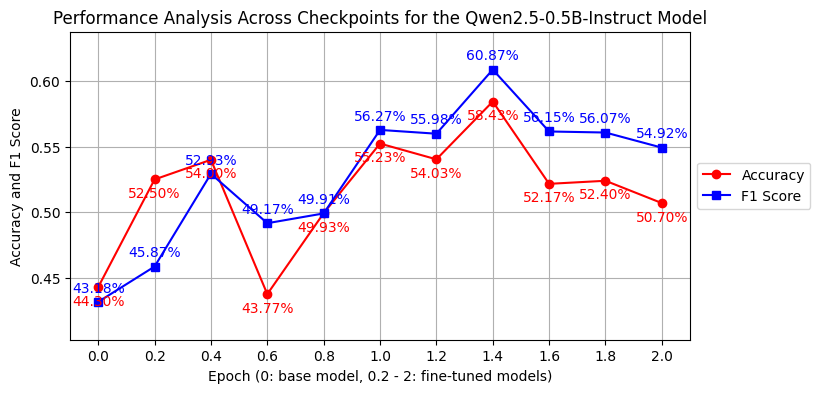

In [39]:
plot_metrics(perf_df, model_name, offset=0.02)

In [40]:
perf_df.to_csv(metrics_csv, index=False)

In [41]:
perf_df_shots = get_metrics_df(df, variant="shots")
perf_df_shots

columns: ['Qwen/Qwen2.5-0.5B-Instruct/shots-00', 'Qwen/Qwen2.5-0.5B-Instruct/shots-05', 'Qwen/Qwen2.5-0.5B-Instruct/shots-10', 'Qwen/Qwen2.5-0.5B-Instruct/shots-20', 'Qwen/Qwen2.5-0.5B-Instruct/shots-30', 'Qwen/Qwen2.5-0.5B-Instruct/shots-40', 'Qwen/Qwen2.5-0.5B-Instruct/shots-50']


/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:478: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perf_df = pd.concat(


shots                  model                                  run  accuracy  \
0     0  Qwen2.5-0.5B-Instruct  Qwen/Qwen2.5-0.5B-Instruct/shots-00  0.443000   
1     5  Qwen2.5-0.5B-Instruct  Qwen/Qwen2.5-0.5B-Instruct/shots-05  0.177000   
2    10  Qwen2.5-0.5B-Instruct  Qwen/Qwen2.5-0.5B-Instruct/shots-10  0.354333   
3    20  Qwen2.5-0.5B-Instruct  Qwen/Qwen2.5-0.5B-Instruct/shots-20  0.436667   
4    30  Qwen2.5-0.5B-Instruct  Qwen/Qwen2.5-0.5B-Instruct/shots-30  0.390667   
5    40  Qwen2.5-0.5B-Instruct  Qwen/Qwen2.5-0.5B-Instruct/shots-40  0.465333   
6    50  Qwen2.5-0.5B-Instruct  Qwen/Qwen2.5-0.5B-Instruct/shots-50  0.502667   

   precision    recall        f1  ratio_valid_classifications  
0   0.549053  0.443000  0.431782                     0.594000  
1   0.490749  0.177000  0.215517                     0.004000  
2   0.521338  0.354333  0.397834                     0.068000  
3   0.523401  0.436667  0.469172                     0.372667  
4   0.546249  0.390667  0.433960                     0.075667  
5   0.546819  0.465333  0.497523                     0.324000  
6   0.561023  0.502667  0.516344                     0.243333

0: Qwen/Qwen2.5-0.5B-Instruct/shots-00
5: Qwen/Qwen2.5-0.5B-Instruct/shots-05
10: Qwen/Qwen2.5-0.5B-Instruct/shots-10
20: Qwen/Qwen2.5-0.5B-Instruct/shots-20
30: Qwen/Qwen2.5-0.5B-Instruct/shots-30
40: Qwen/Qwen2.5-0.5B-Instruct/shots-40
50: Qwen/Qwen2.5-0.5B-Instruct/shots-50


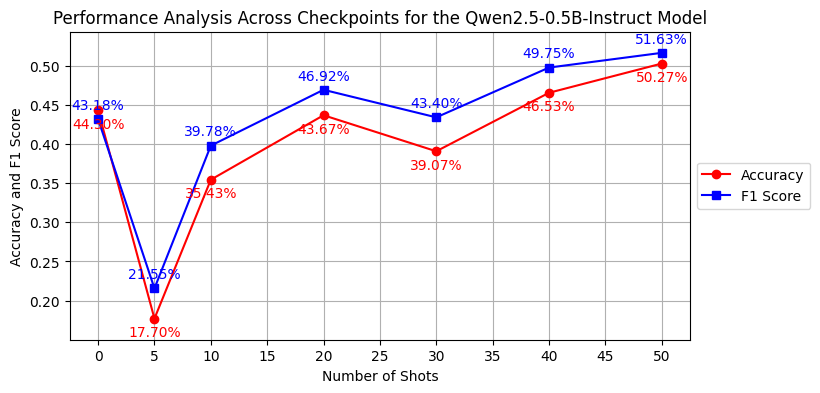

In [42]:
plot_metrics(perf_df_shots, model_name, variant="shots")

In [43]:
perf_df_shots.to_csv(
    metrics_csv.replace("metrics.csv", "shots_metrics.csv"), index=False
)

********** Qwen/Qwen2.5-0.5B-Instruct/shots-00 **********
Qwen/Qwen2.5-0.5B-Instruct/shots-00
是                                                                                                                                                                                                             1194
回答: 是                                                                                                                                                                                                          737
不是                                                                                                                                                                                                             498
回答: 不重要                                                                                                                                                                                                        263
不重要                                                           

/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31572 (\N{CJK UNIFIED IDEOGRAPH-7B54}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

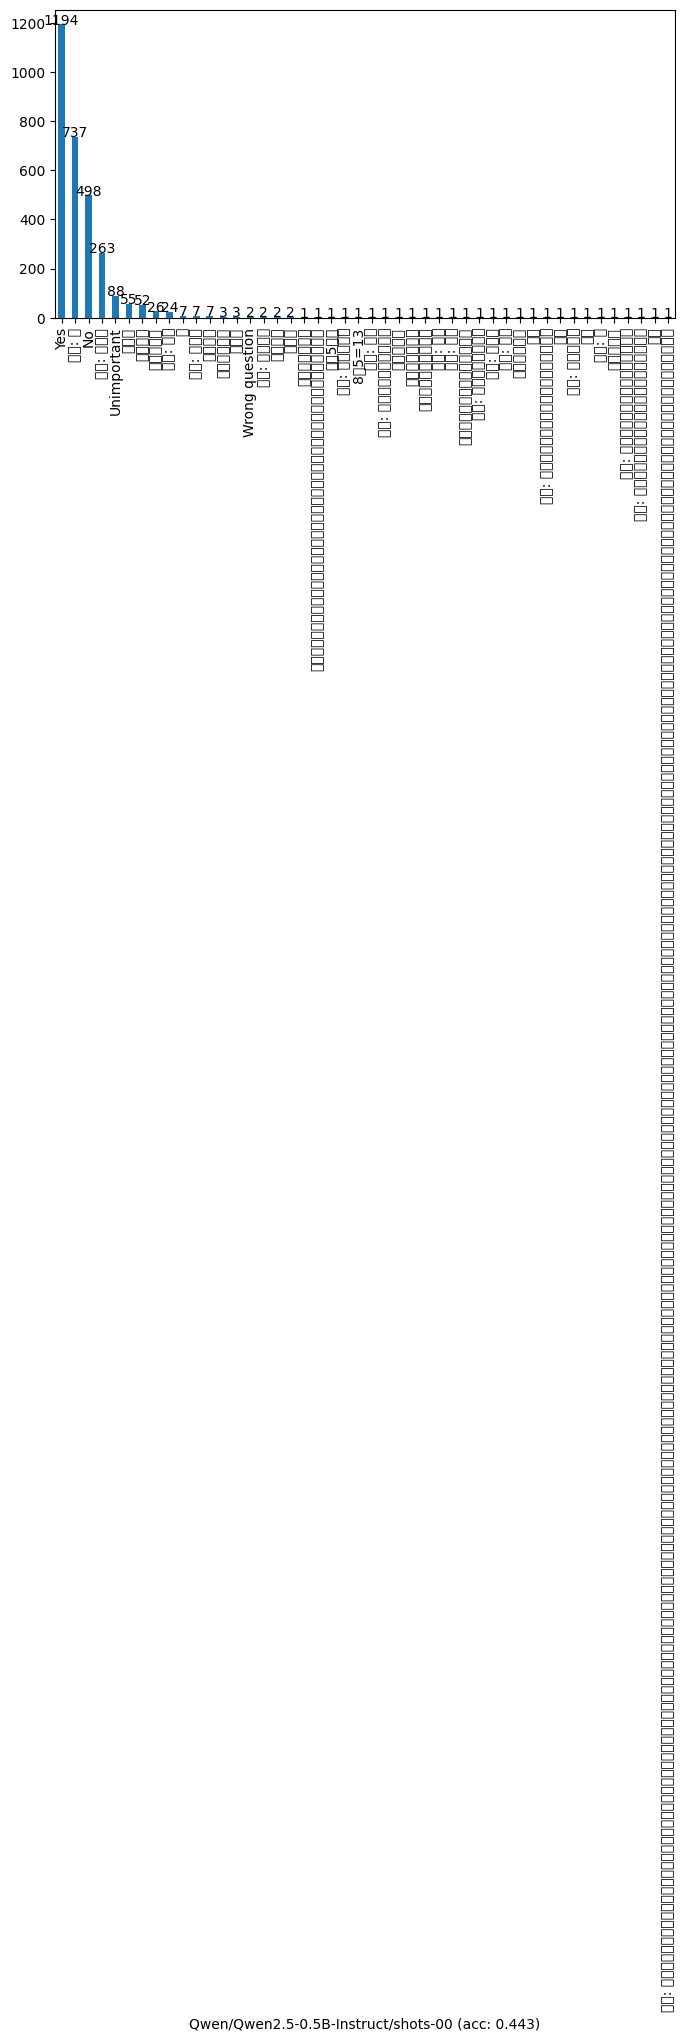

********** Qwen/Qwen2.5-0.5B-Instruct/shots-05 **********
Qwen/Qwen2.5-0.5B-Instruct/shots-05
回答: 回答正确                 1091
回答: 不重要                  1031
回答: 是                     643
回答: 不是                    214
是                           7
不是                          3
回答: 小男孩                     2
回答: 他跳湖是因为看到了一只巨大的海龟。       1
回答: 问法错误                    1
回答: 他要带走的是人。                1
问法错误                        1
回答: 是为小男孩而哭的。               1
不重要                         1
妻子                          1
回答: 是圆形的                    1
回答: 早上7点                    1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31572 (\N{CJK UNIFIED IDEOGRAPH-7B54}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30830 (\N{CJK UNIFIED IDEOGRAPH-786E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

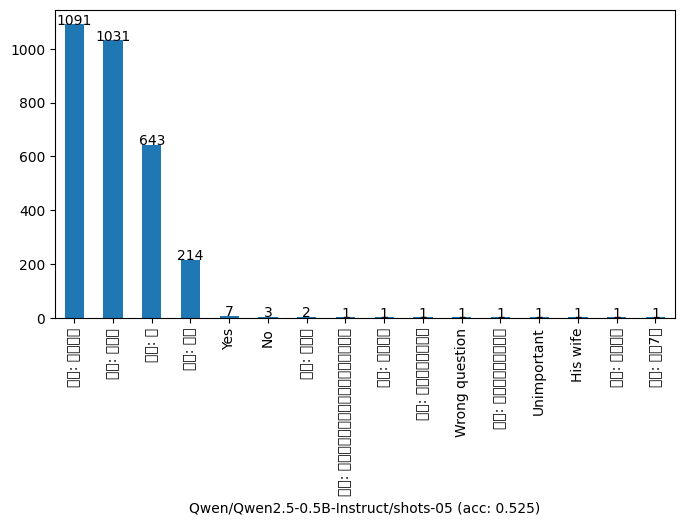

********** Qwen/Qwen2.5-0.5B-Instruct/shots-10 **********
Qwen/Qwen2.5-0.5B-Instruct/shots-10
回答: 是                                                                                                                                                                                                                                                                                                                                                          1086
回答: 不重要                                                                                                                                                                                                                                                                                                                                                         589
回答: 不是                                                                                                                                                                                            

/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31572 (\N{CJK UNIFIED IDEOGRAPH-7B54}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

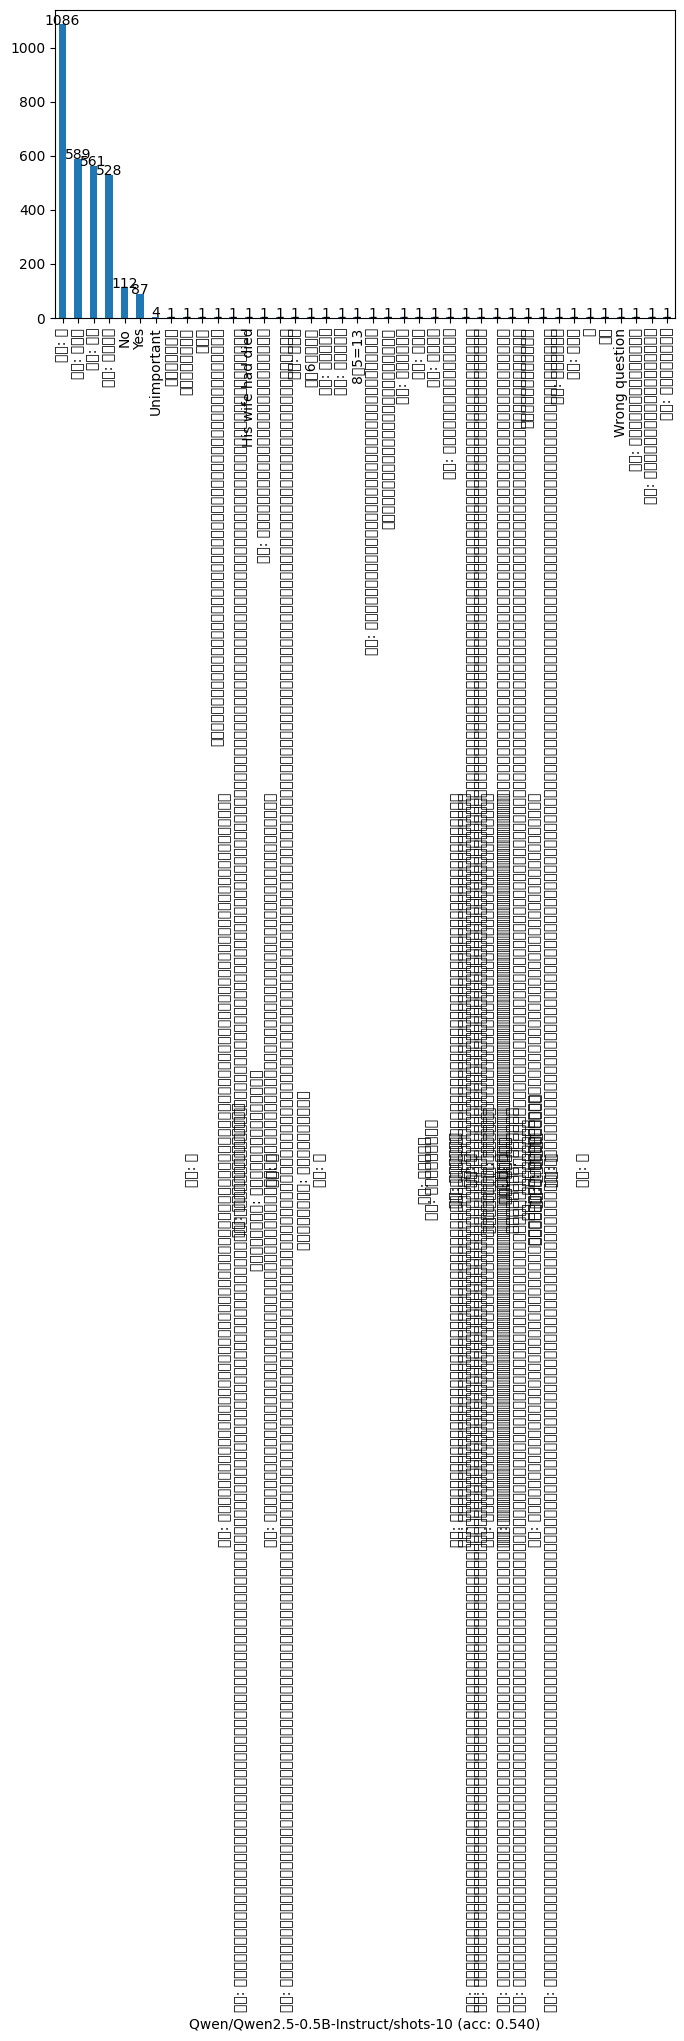

********** Qwen/Qwen2.5-0.5B-Instruct/shots-20 **********
Qwen/Qwen2.5-0.5B-Instruct/shots-20
回答: 是                                                                                                                                                                                                                                                                                                                                               742
不是                                                                                                                                                                                                                                                                                                                                                  738
回答: 不是                                                                                                                                                                                                                    

/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31572 (\N{CJK UNIFIED IDEOGRAPH-7B54}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

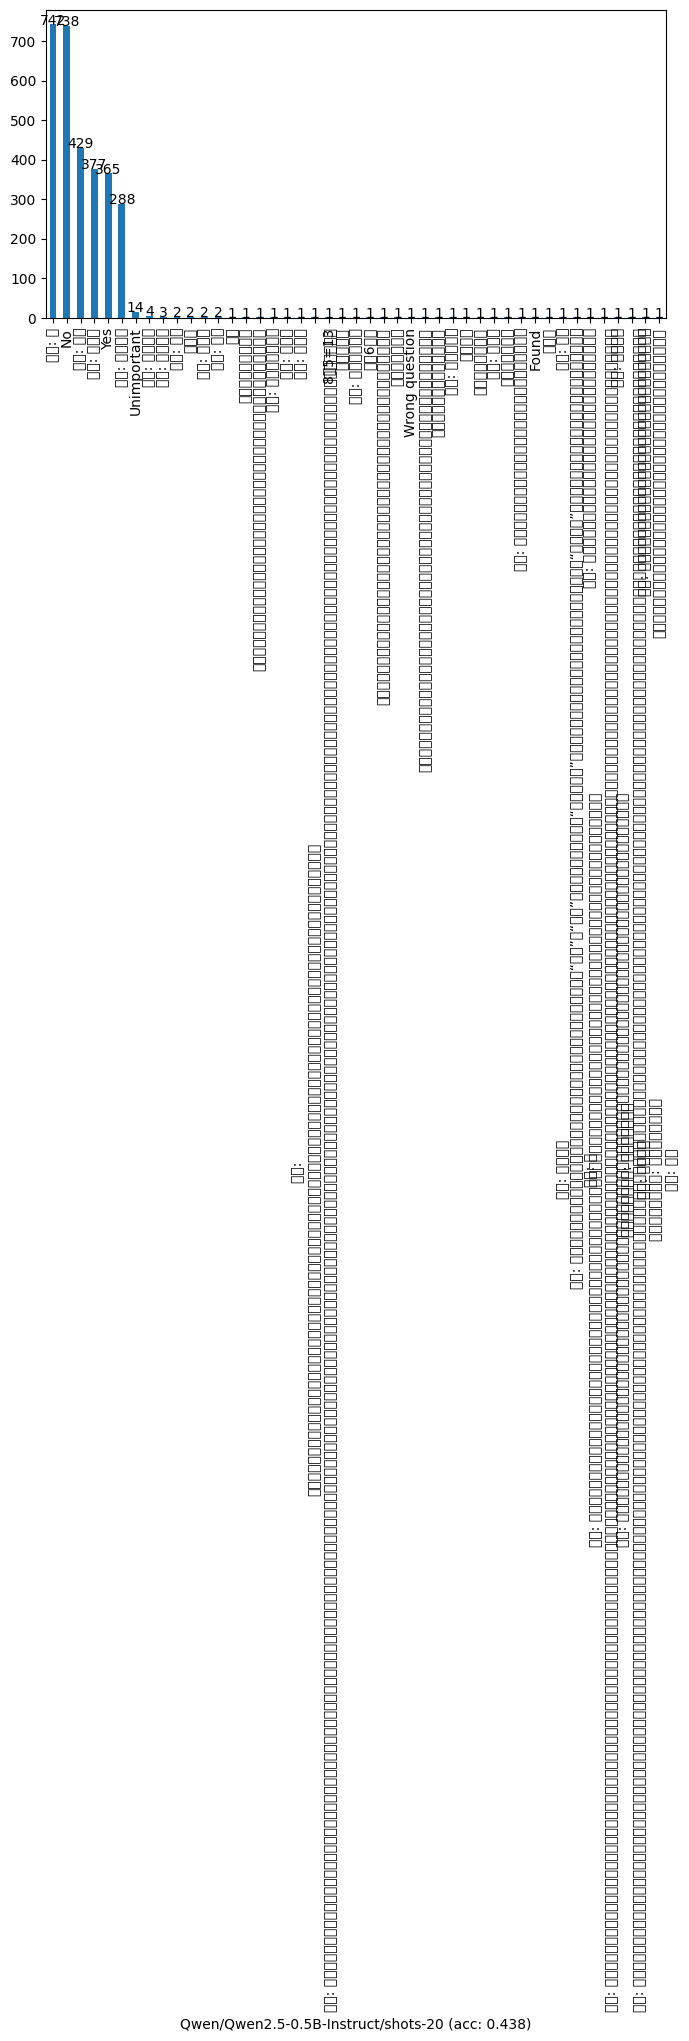

/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


********** Qwen/Qwen2.5-0.5B-Instruct/shots-30 **********
Qwen/Qwen2.5-0.5B-Instruct/shots-30
回答: 是                                                                                                                                                                                                                                                                                                                                                  1083
回答: 不重要                                                                                                                                                                                                                                                                                                                                                 671
回答: 不是                                                                                                                                                                                                            

/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31572 (\N{CJK UNIFIED IDEOGRAPH-7B54}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

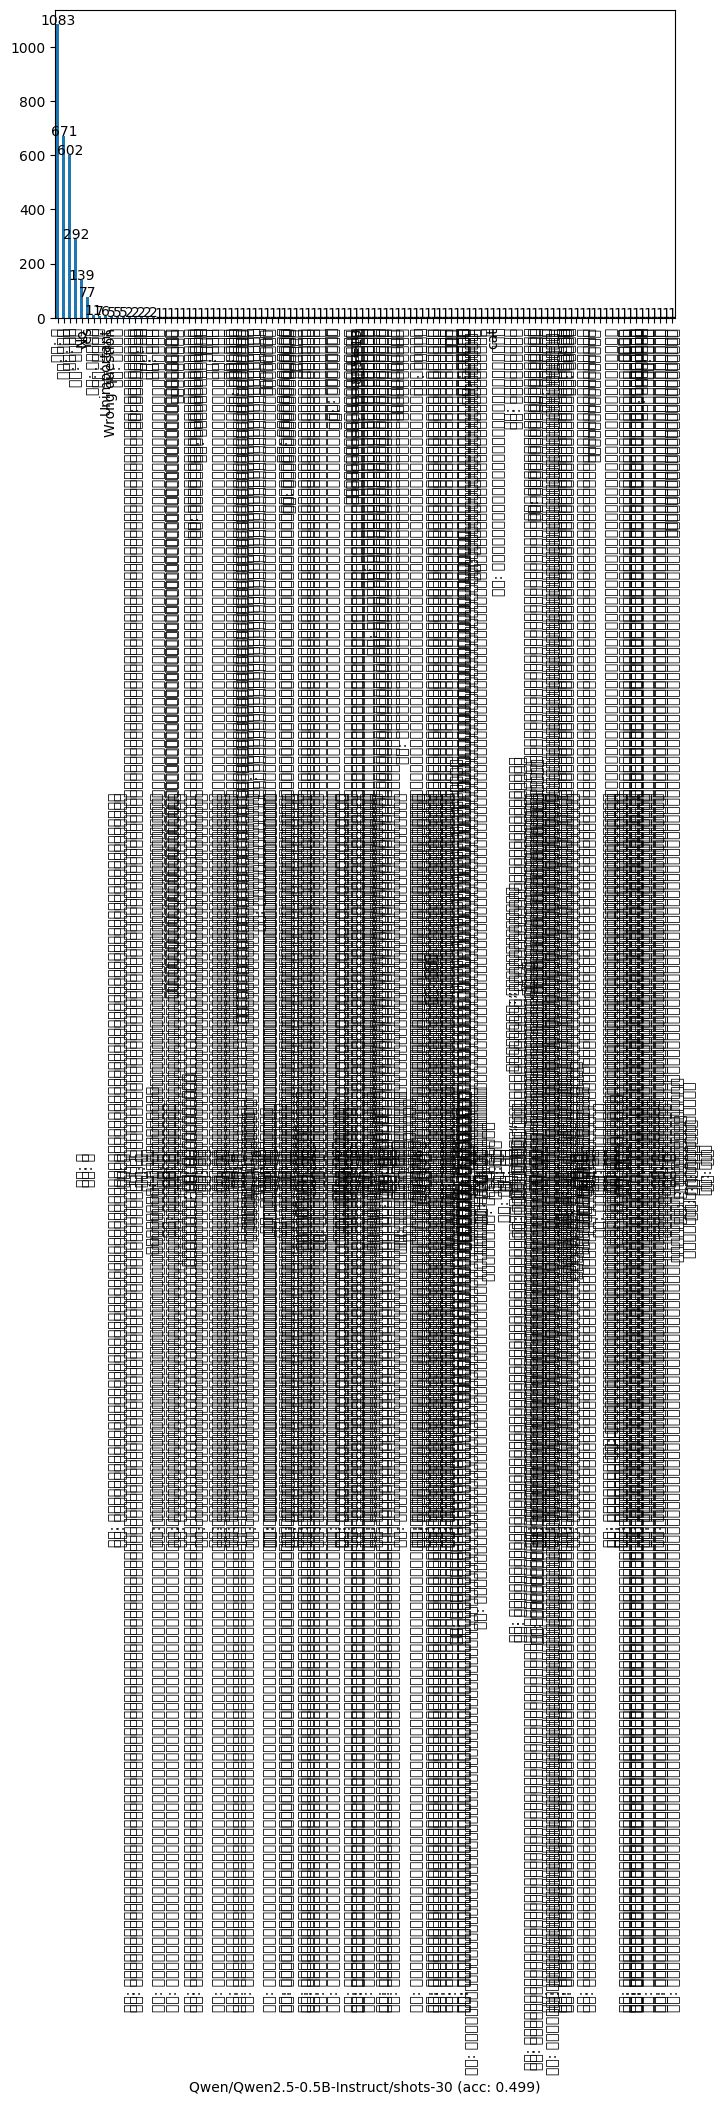

********** Qwen/Qwen2.5-0.5B-Instruct_torch.float16_lf **********
Qwen/Qwen2.5-0.5B-Instruct_torch.float16_lf
是                                                                                                                                                                                                             1194
回答: 是                                                                                                                                                                                                          737
不是                                                                                                                                                                                                             498
回答: 不重要                                                                                                                                                                                                        263
不重要                                           

/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31572 (\N{CJK UNIFIED IDEOGRAPH-7B54}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

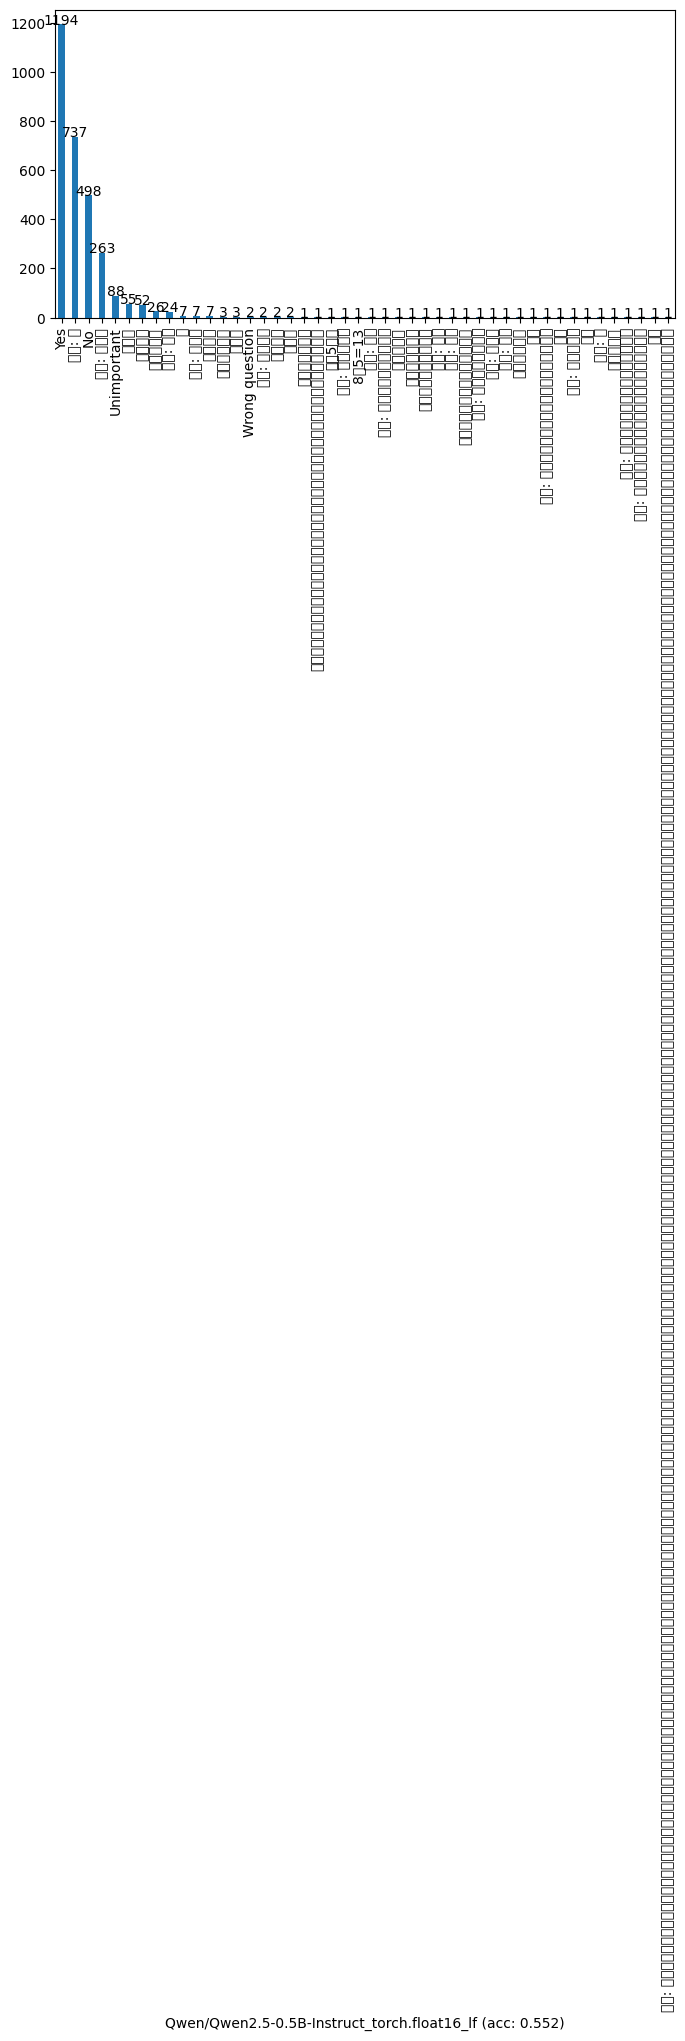

********** Qwen/Qwen2.5-0.5B-Instruct/checkpoint-35_torch.float16_lf **********
Qwen/Qwen2.5-0.5B-Instruct/checkpoint-35_torch.float16_lf
不是      2499
是        274
不重要      212
回答正确      13
问法错误       2
Name: count, dtype: int64


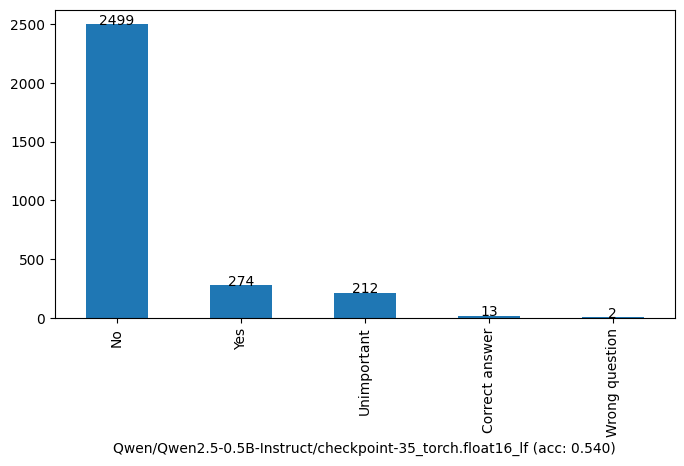

********** Qwen/Qwen2.5-0.5B-Instruct/checkpoint-70_torch.float16_lf **********
Qwen/Qwen2.5-0.5B-Instruct/checkpoint-70_torch.float16_lf
不是      2022
不重要      523
是        427
回答正确      23
问法错误       5
Name: count, dtype: int64


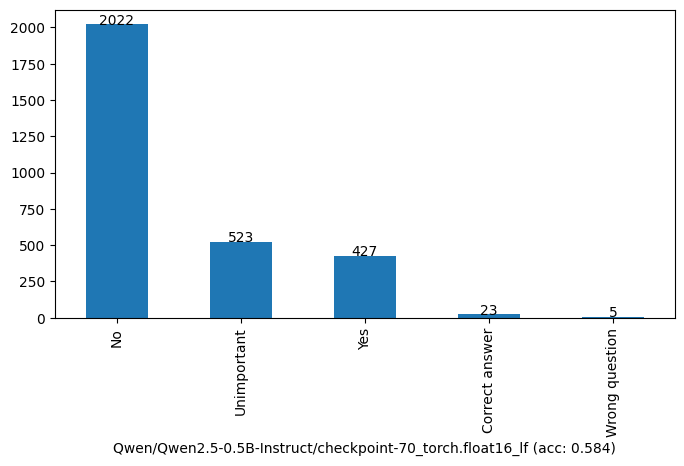

********** Qwen/Qwen2.5-0.5B-Instruct/checkpoint-105_torch.float16_lf **********
Qwen/Qwen2.5-0.5B-Instruct/checkpoint-105_torch.float16_lf
不是      1302
不重要     1134
是        496
问法错误      37
回答正确      31
Name: count, dtype: int64


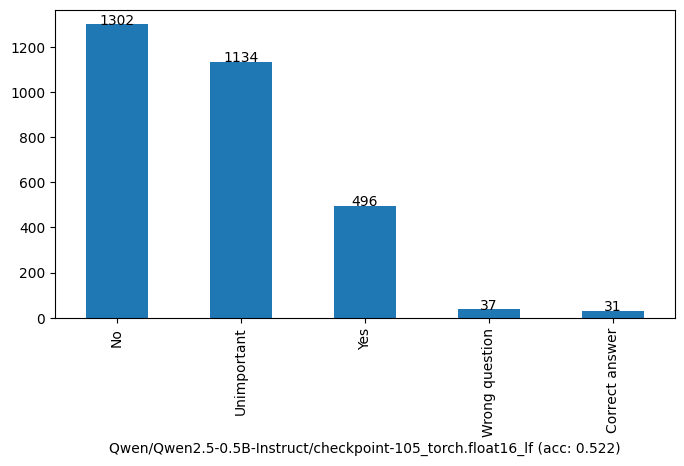

********** Qwen/Qwen2.5-0.5B-Instruct/checkpoint-140_torch.float16_lf **********
Qwen/Qwen2.5-0.5B-Instruct/checkpoint-140_torch.float16_lf
不是      1864
不重要      618
是        348
问法错误     142
回答正确      28
Name: count, dtype: int64


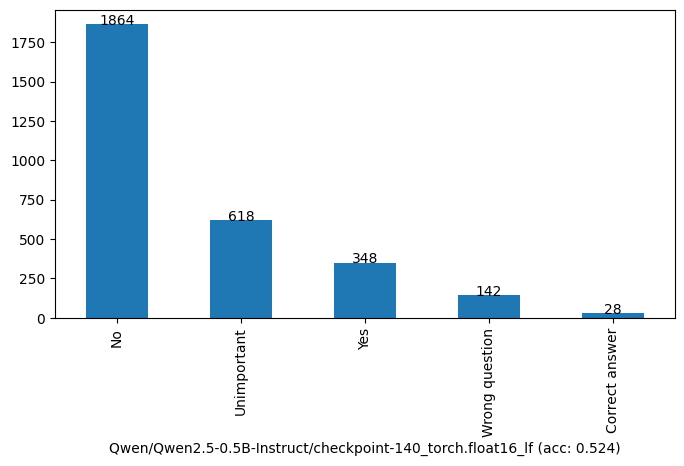

********** Qwen/Qwen2.5-0.5B-Instruct/checkpoint-175_torch.float16_lf **********
Qwen/Qwen2.5-0.5B-Instruct/checkpoint-175_torch.float16_lf
不是      1787
不重要      576
是        539
问法错误      69
回答正确      29
Name: count, dtype: int64


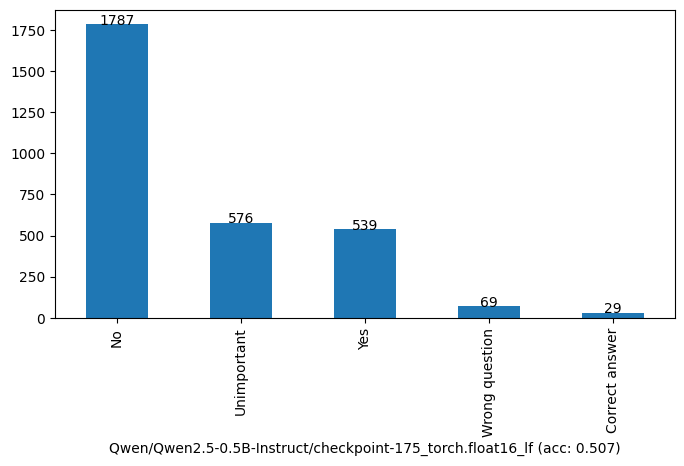

In [44]:
for col, accuracy in zip(df.columns[5:], perf_df["accuracy"].to_list()):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(df, col, title=f"{col} (acc: {accuracy:.3f})")

********** Qwen/Qwen2.5-0.5B-Instruct/shots-00 **********
Qwen/Qwen2.5-0.5B-Instruct/shots-00
是                                                                                                                                                                                                             1194
回答: 是                                                                                                                                                                                                          737
不是                                                                                                                                                                                                             498
回答: 不重要                                                                                                                                                                                                        263
不重要                                                           

/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31572 (\N{CJK UNIFIED IDEOGRAPH-7B54}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logi

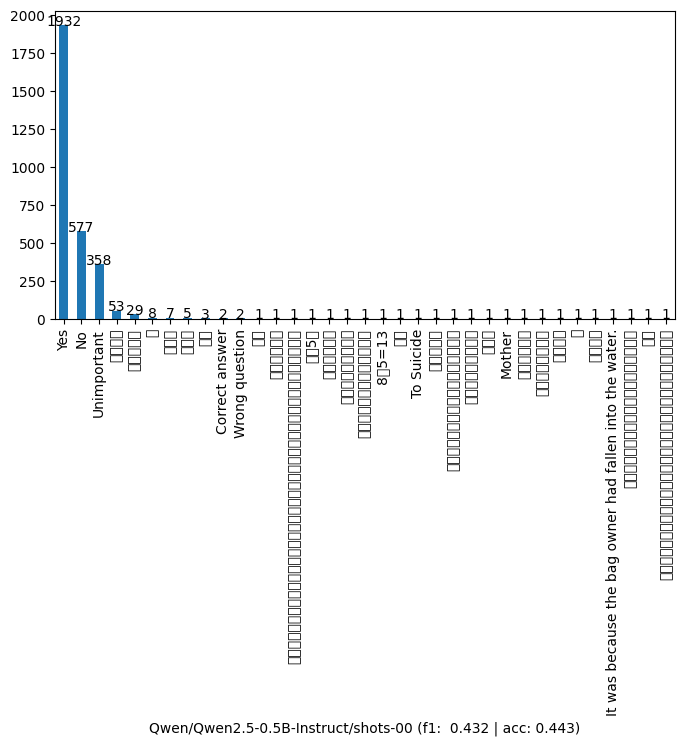

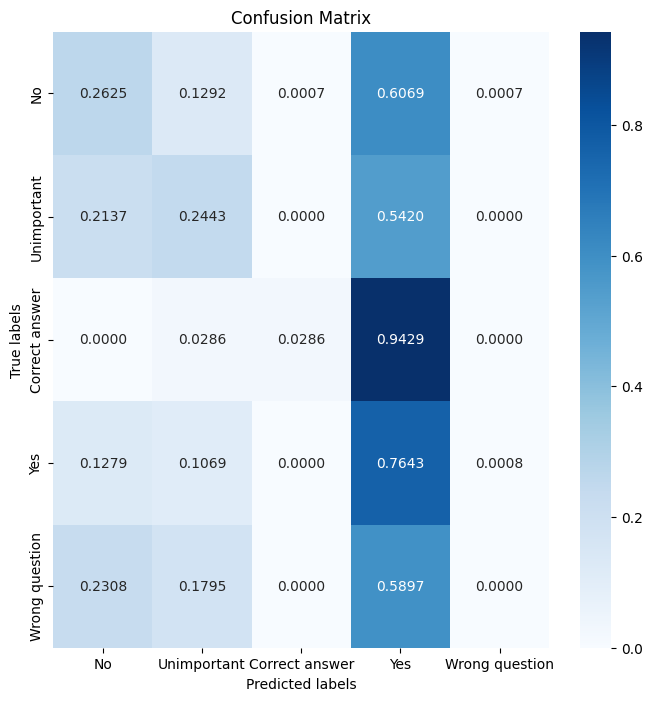

********** Qwen/Qwen2.5-0.5B-Instruct/shots-05 **********
Qwen/Qwen2.5-0.5B-Instruct/shots-05
回答: 回答正确                 1091
回答: 不重要                  1031
回答: 是                     643
回答: 不是                    214
是                           7
不是                          3
回答: 小男孩                     2
回答: 他跳湖是因为看到了一只巨大的海龟。       1
回答: 问法错误                    1
回答: 他要带走的是人。                1
问法错误                        1
回答: 是为小男孩而哭的。               1
不重要                         1
妻子                          1
回答: 是圆形的                    1
回答: 早上7点                    1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30007 (\N{CJK UNIFIED IDEOGRAPH-7537}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23401 (\N{CJK UNIFIED IDEOGRAPH-5B69}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20182 (\N{CJK UNIFIED IDEOGRAPH-4ED6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

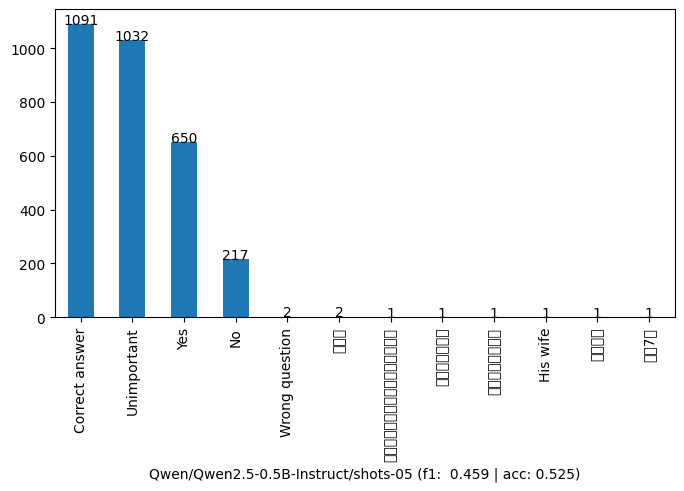

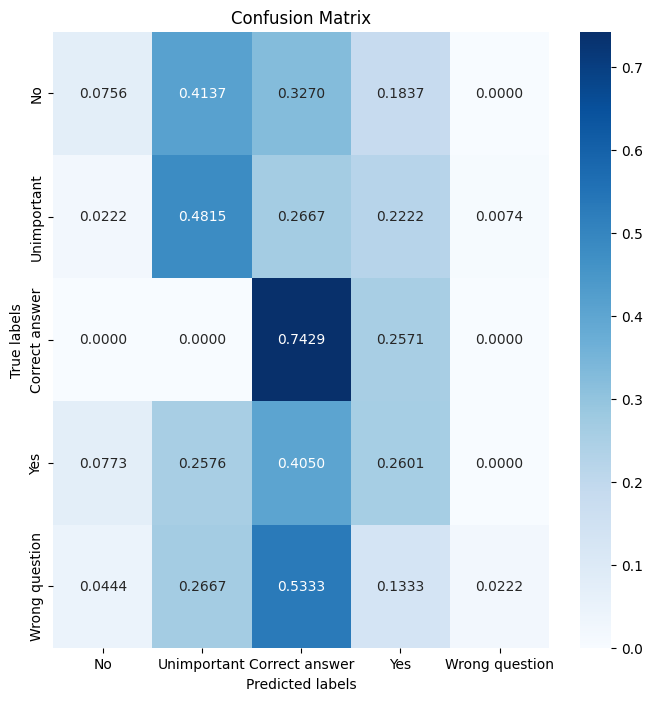

********** Qwen/Qwen2.5-0.5B-Instruct/shots-10 **********
Qwen/Qwen2.5-0.5B-Instruct/shots-10
回答: 是                                                                                                                                                                                                                                                                                                                                                          1086
回答: 不重要                                                                                                                                                                                                                                                                                                                                                         589
回答: 不是                                                                                                                                                                                            

/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21741 (\N{CJK UNIFIED IDEOGRAPH-54ED}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27875 (\N{CJK UNIFIED IDEOGRAPH-6CE3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22768 (\N{CJK UNIFIED IDEOGRAPH-58F0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

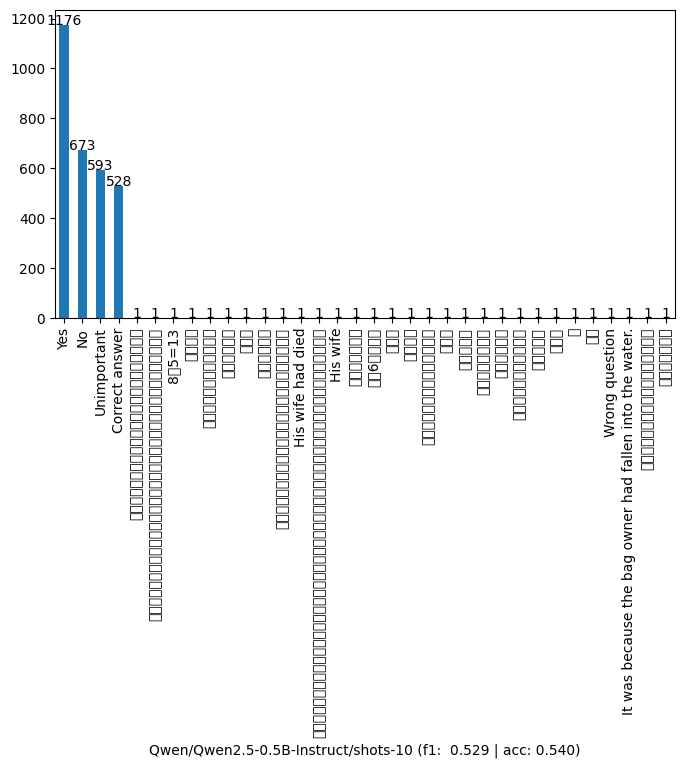

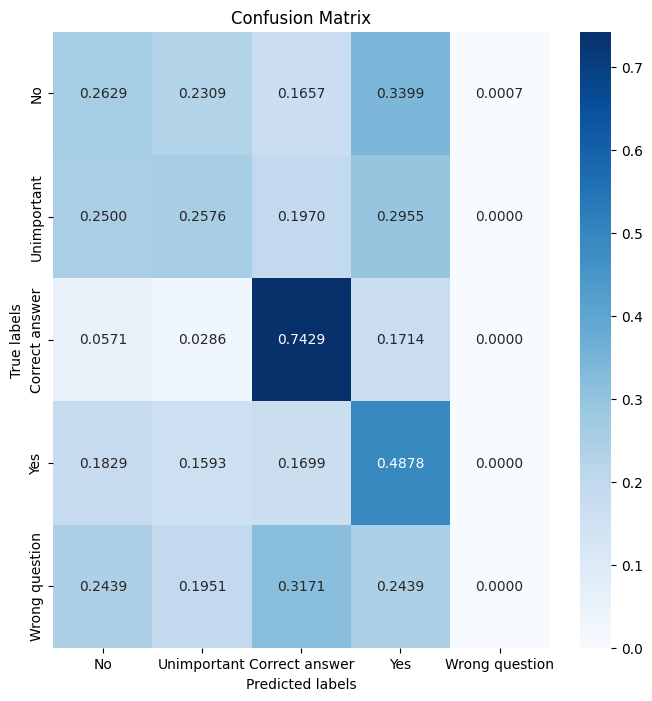

********** Qwen/Qwen2.5-0.5B-Instruct/shots-20 **********
Qwen/Qwen2.5-0.5B-Instruct/shots-20
回答: 是                                                                                                                                                                                                                                                                                                                                               742
不是                                                                                                                                                                                                                                                                                                                                                  738
回答: 不是                                                                                                                                                                                                                    

/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31572 (\N{CJK UNIFIED IDEOGRAPH-7B54}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38169 (\N{CJK UNIFIED IDEOGRAPH-9519}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35823 (\N{CJK UNIFIED IDEOGRAPH-8BEF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

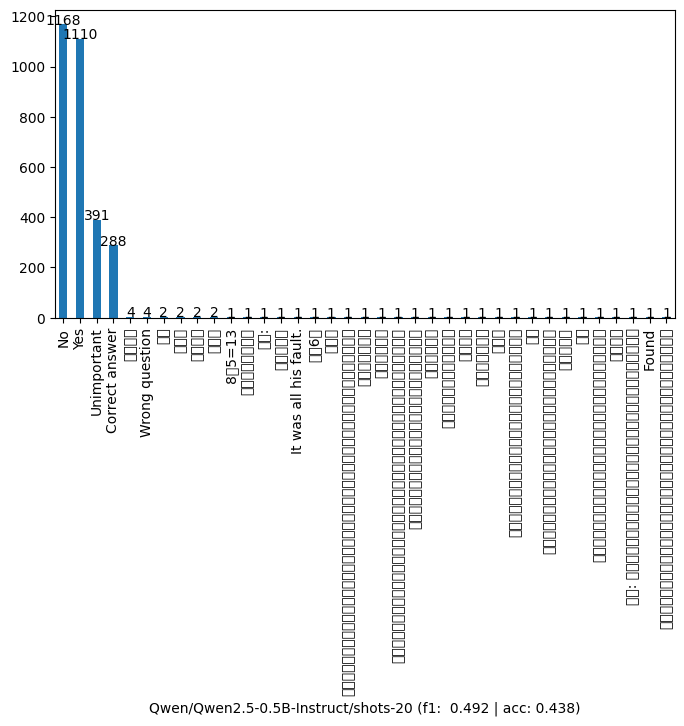

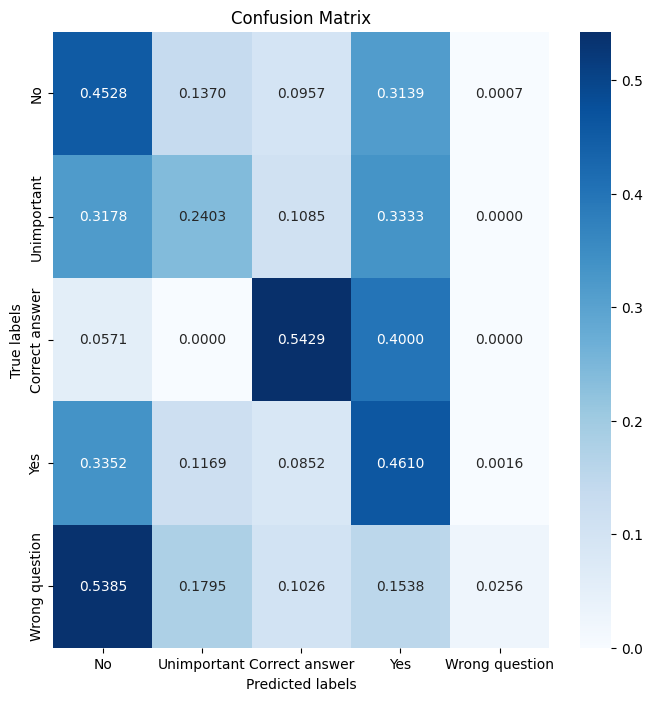

********** Qwen/Qwen2.5-0.5B-Instruct/shots-30 **********
Qwen/Qwen2.5-0.5B-Instruct/shots-30
回答: 是                                                                                                                                                                                                                                                                                                                                                  1083
回答: 不重要                                                                                                                                                                                                                                                                                                                                                 671
回答: 不是                                                                                                                                                                                                            

/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31572 (\N{CJK UNIFIED IDEOGRAPH-7B54}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38169 (\N{CJK UNIFIED IDEOGRAPH-9519}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35823 (\N{CJK UNIFIED IDEOGRAPH-8BEF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

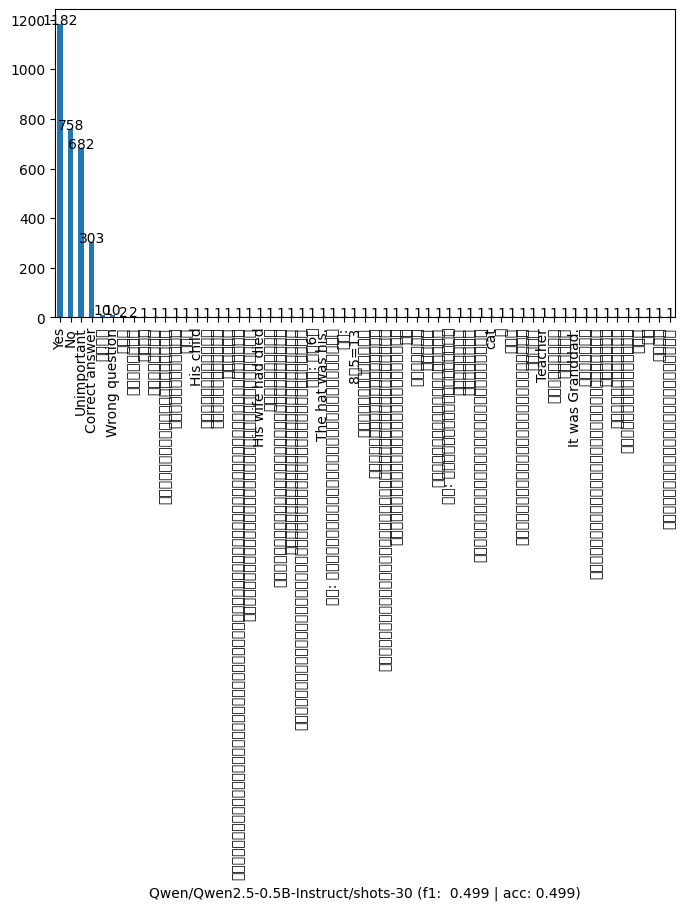

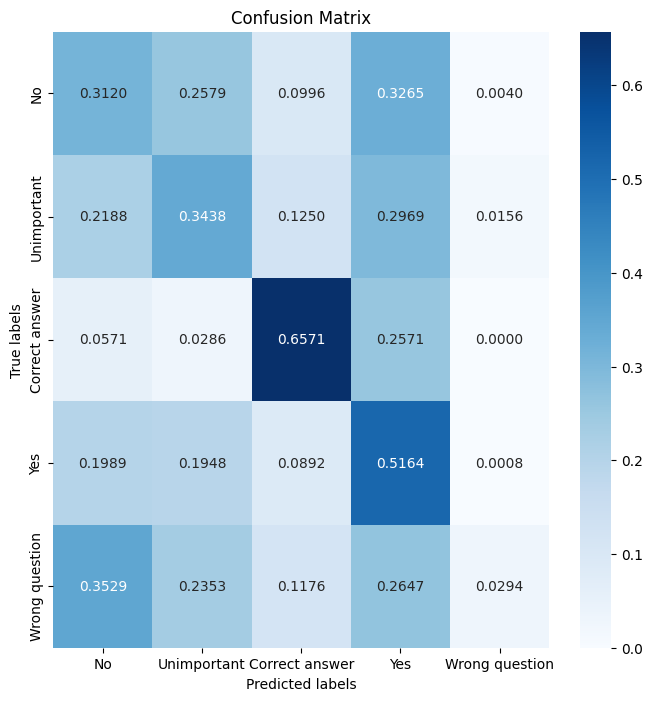

********** Qwen/Qwen2.5-0.5B-Instruct_torch.float16_lf **********
Qwen/Qwen2.5-0.5B-Instruct_torch.float16_lf
是                                                                                                                                                                                                             1194
回答: 是                                                                                                                                                                                                          737
不是                                                                                                                                                                                                             498
回答: 不重要                                                                                                                                                                                                        263
不重要                                           

/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31572 (\N{CJK UNIFIED IDEOGRAPH-7B54}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logi

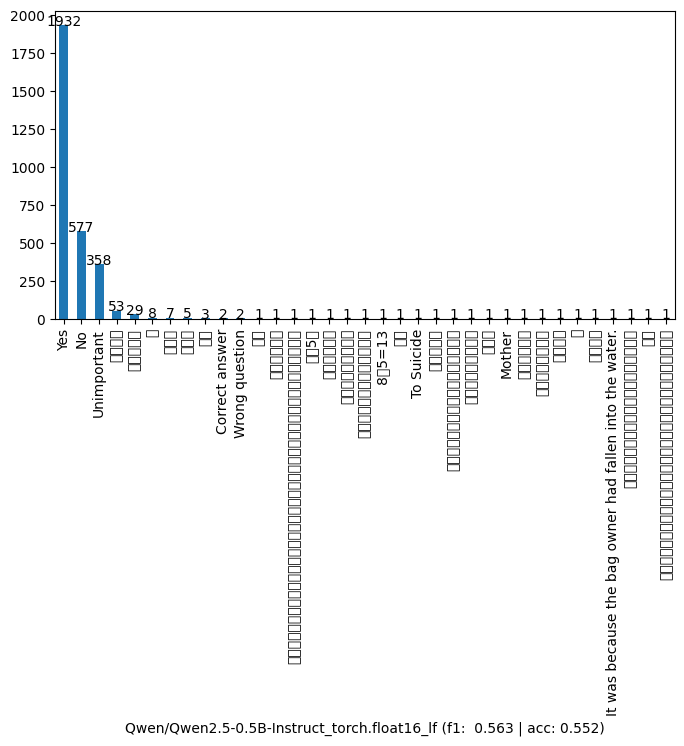

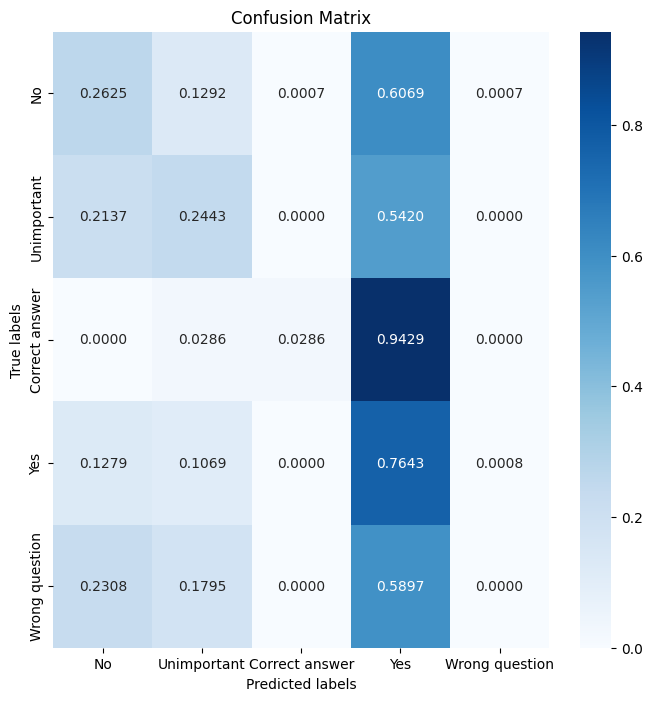

********** Qwen/Qwen2.5-0.5B-Instruct/checkpoint-35_torch.float16_lf **********
Qwen/Qwen2.5-0.5B-Instruct/checkpoint-35_torch.float16_lf
不是      2499
是        274
不重要      212
回答正确      13
问法错误       2
Name: count, dtype: int64


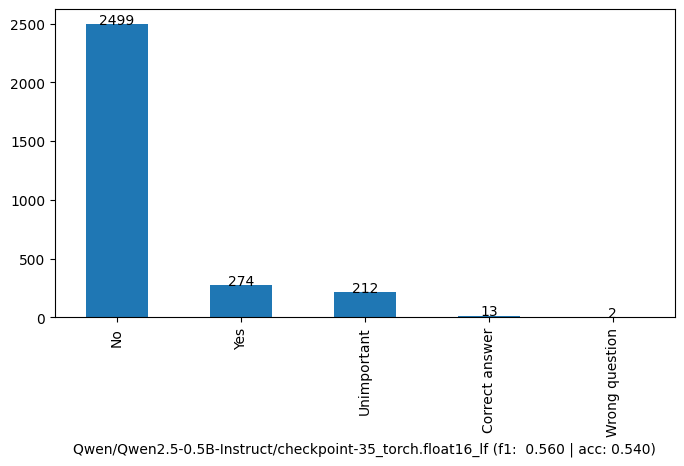

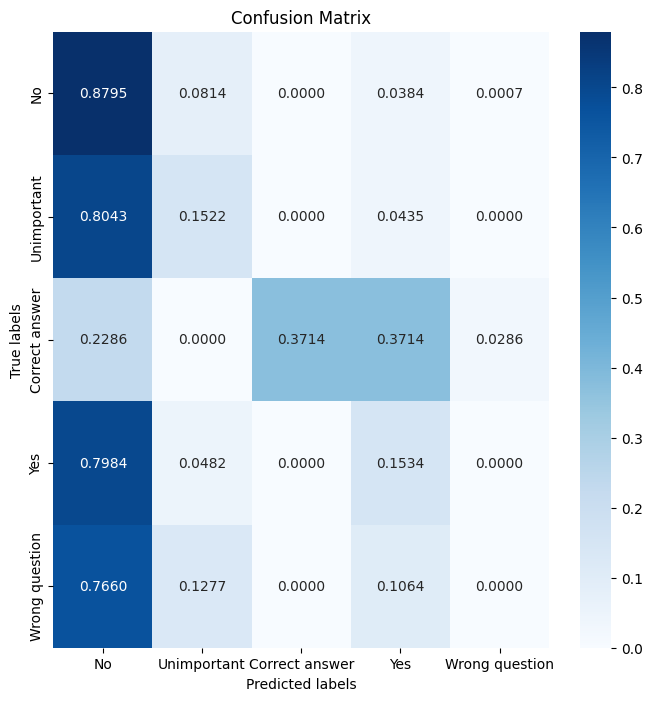

********** Qwen/Qwen2.5-0.5B-Instruct/checkpoint-70_torch.float16_lf **********
Qwen/Qwen2.5-0.5B-Instruct/checkpoint-70_torch.float16_lf
不是      2022
不重要      523
是        427
回答正确      23
问法错误       5
Name: count, dtype: int64


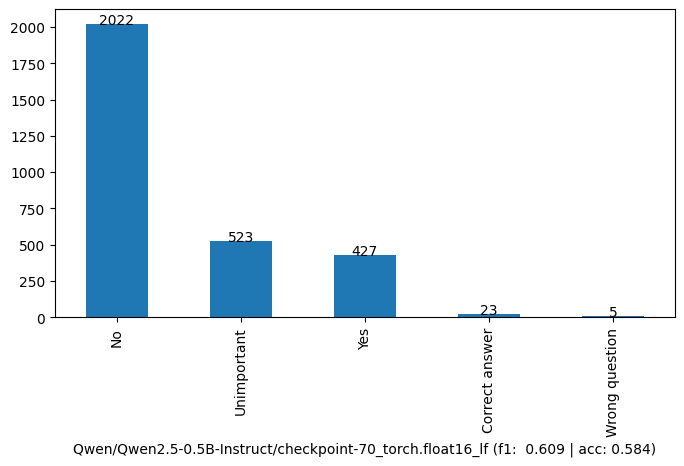

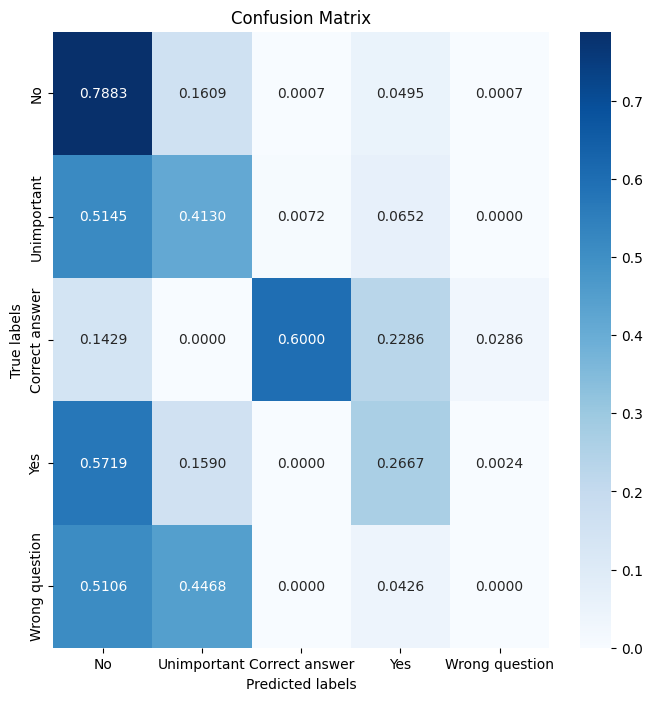

********** Qwen/Qwen2.5-0.5B-Instruct/checkpoint-105_torch.float16_lf **********
Qwen/Qwen2.5-0.5B-Instruct/checkpoint-105_torch.float16_lf
不是      1302
不重要     1134
是        496
问法错误      37
回答正确      31
Name: count, dtype: int64


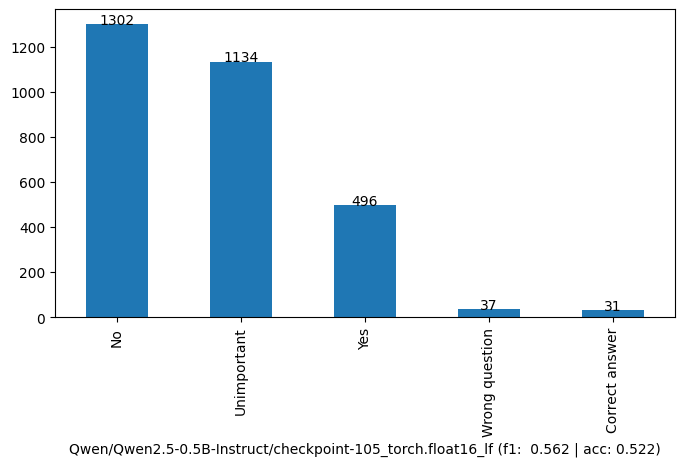

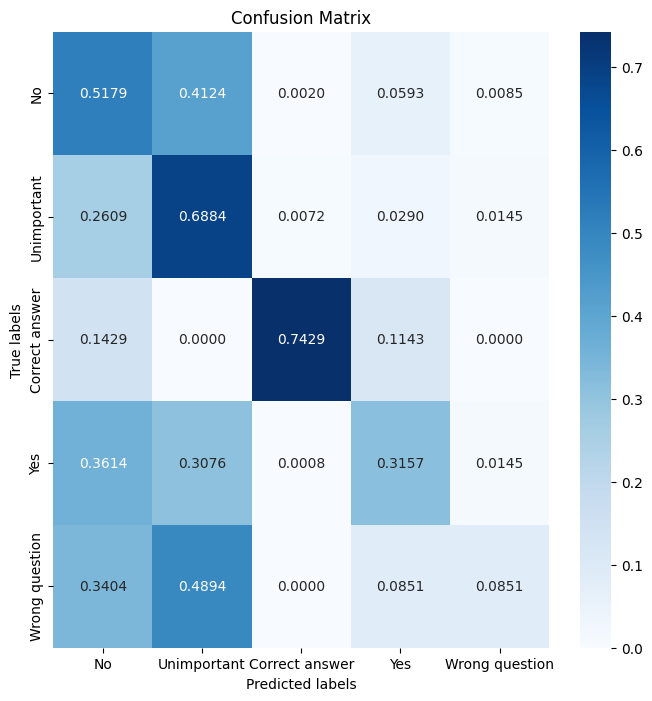

********** Qwen/Qwen2.5-0.5B-Instruct/checkpoint-140_torch.float16_lf **********
Qwen/Qwen2.5-0.5B-Instruct/checkpoint-140_torch.float16_lf
不是      1864
不重要      618
是        348
问法错误     142
回答正确      28
Name: count, dtype: int64


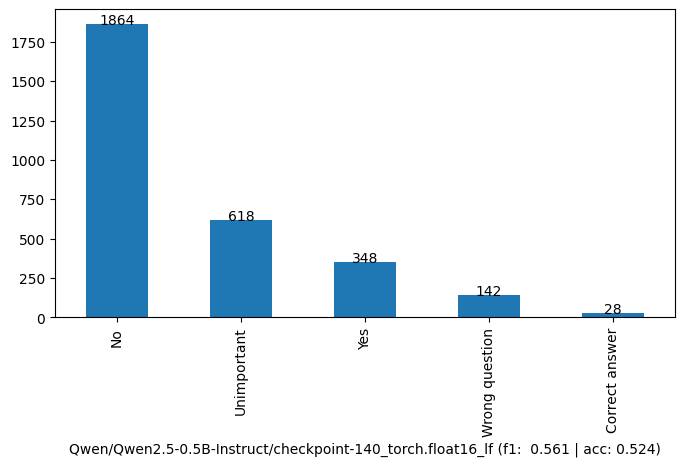

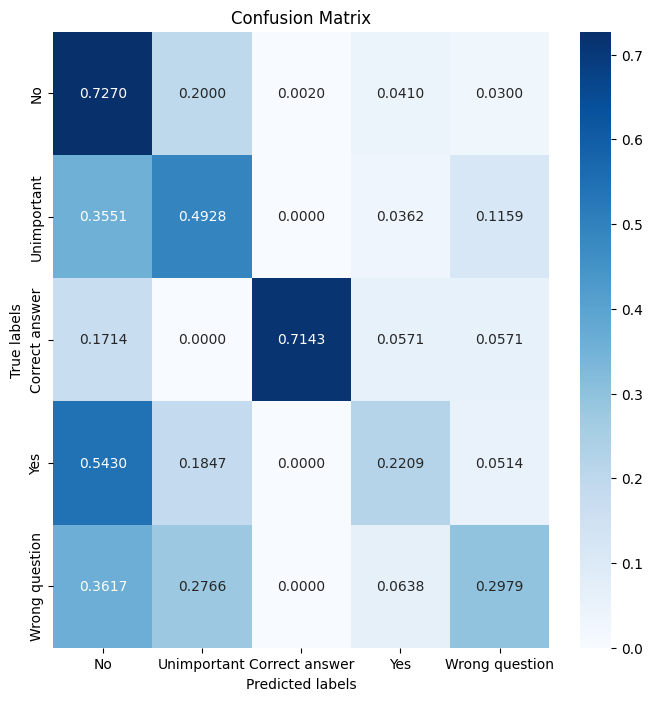

********** Qwen/Qwen2.5-0.5B-Instruct/checkpoint-175_torch.float16_lf **********
Qwen/Qwen2.5-0.5B-Instruct/checkpoint-175_torch.float16_lf
不是      1787
不重要      576
是        539
问法错误      69
回答正确      29
Name: count, dtype: int64


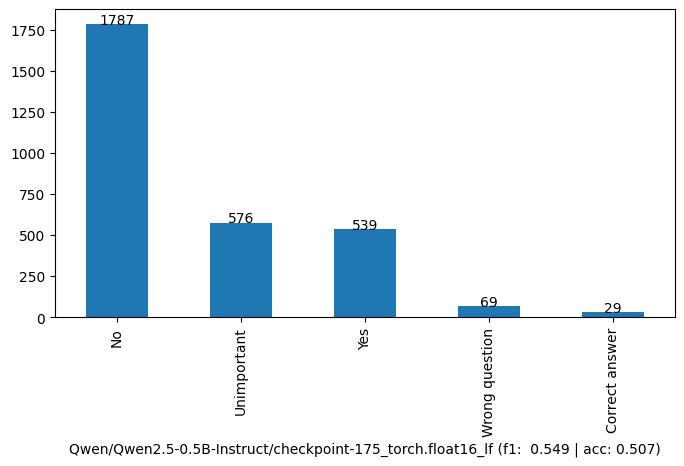

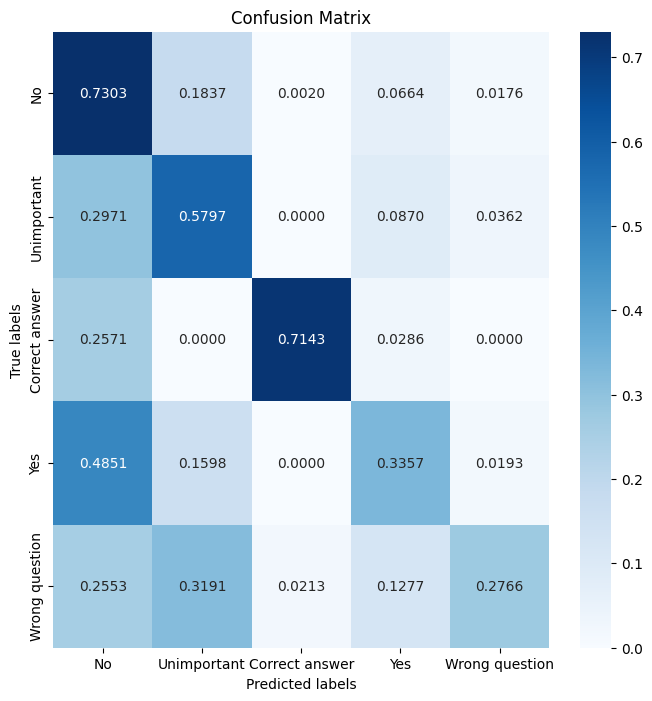

In [45]:
for col, f1, accuracy in zip(
    df.columns[5:], perf_df["f1"].to_list(), perf_df["accuracy"].to_list()
):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(
        df,
        col,
        title=f"{col} (f1: {f1: .3f} | acc: {accuracy:.3f})",
        preprocess_func=extract_answer,
    )

********** Qwen/Qwen2.5-0.5B-Instruct/checkpoint-210_torch.float16_lf **********
Qwen/Qwen2.5-0.5B-Instruct/checkpoint-210_torch.float16_lf
不是      1707
是        630
不重要      551
问法错误      91
回答正确      21
Name: count, dtype: int64


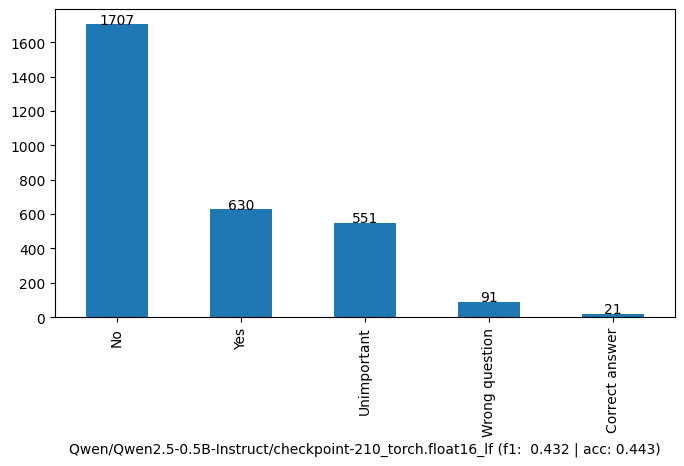

********** Qwen/Qwen2.5-0.5B-Instruct/checkpoint-245_torch.float16_lf **********
Qwen/Qwen2.5-0.5B-Instruct/checkpoint-245_torch.float16_lf
不是      1521
是        907
不重要      503
问法错误      48
回答正确      21
Name: count, dtype: int64


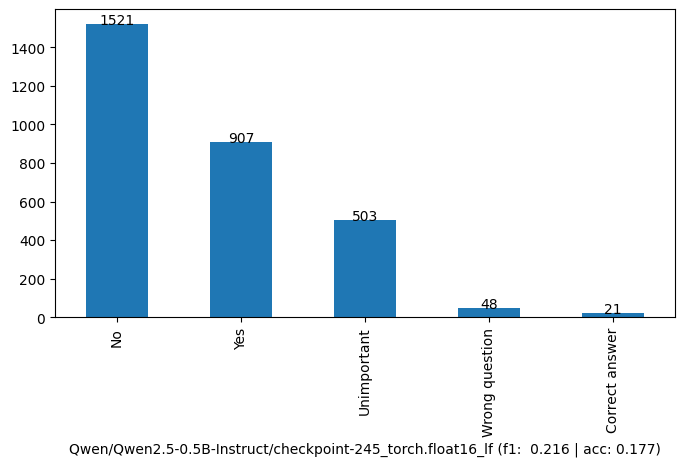

********** Qwen/Qwen2.5-0.5B-Instruct/checkpoint-280_torch.float16_lf **********
Qwen/Qwen2.5-0.5B-Instruct/checkpoint-280_torch.float16_lf
不是      1453
不重要      728
是        689
问法错误     112
回答正确      18
Name: count, dtype: int64


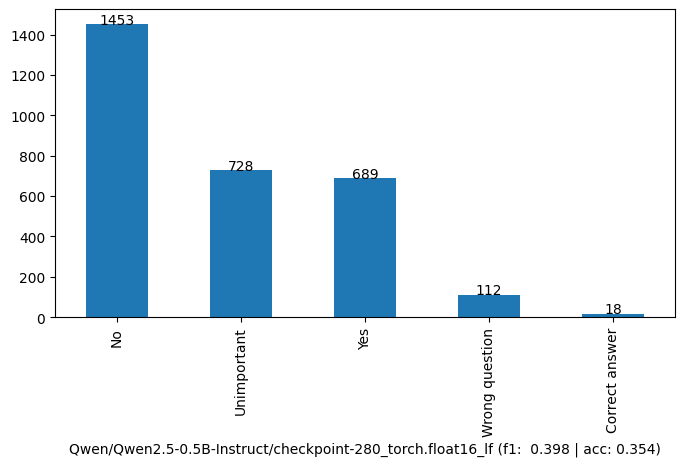

********** Qwen/Qwen2.5-0.5B-Instruct/checkpoint-315_torch.float16_lf **********
Qwen/Qwen2.5-0.5B-Instruct/checkpoint-315_torch.float16_lf
不是      1506
不重要      751
是        633
问法错误      88
回答正确      22
Name: count, dtype: int64


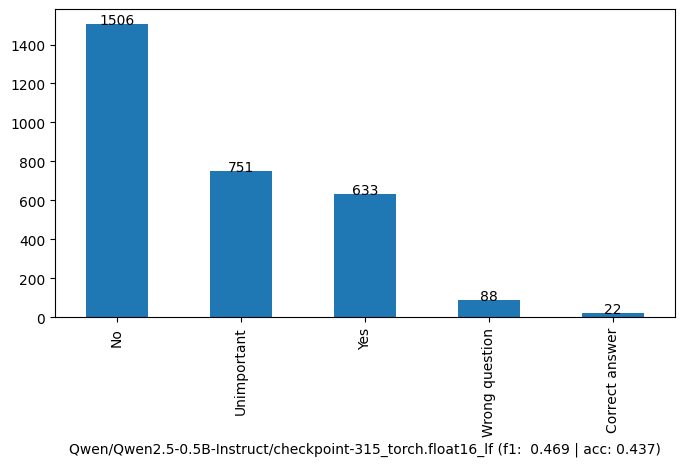

********** Qwen/Qwen2.5-0.5B-Instruct/checkpoint-350_torch.float16_lf **********
Qwen/Qwen2.5-0.5B-Instruct/checkpoint-350_torch.float16_lf
不是      1439
不重要      808
是        638
问法错误      94
回答正确      21
Name: count, dtype: int64


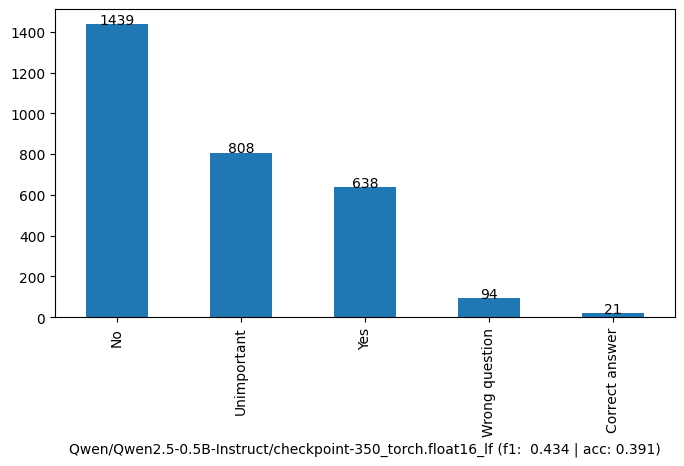

********** Qwen/Qwen2.5-0.5B-Instruct/shots-40 **********
Qwen/Qwen2.5-0.5B-Instruct/shots-40
不是                                                                                                                                                                                                                                                                                                                                                                           703
回答: 是                                                                                                                                                                                                                                                                                                                                                                        568
回答: 不是                                                                                                                                                                  

/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31572 (\N{CJK UNIFIED IDEOGRAPH-7B54}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

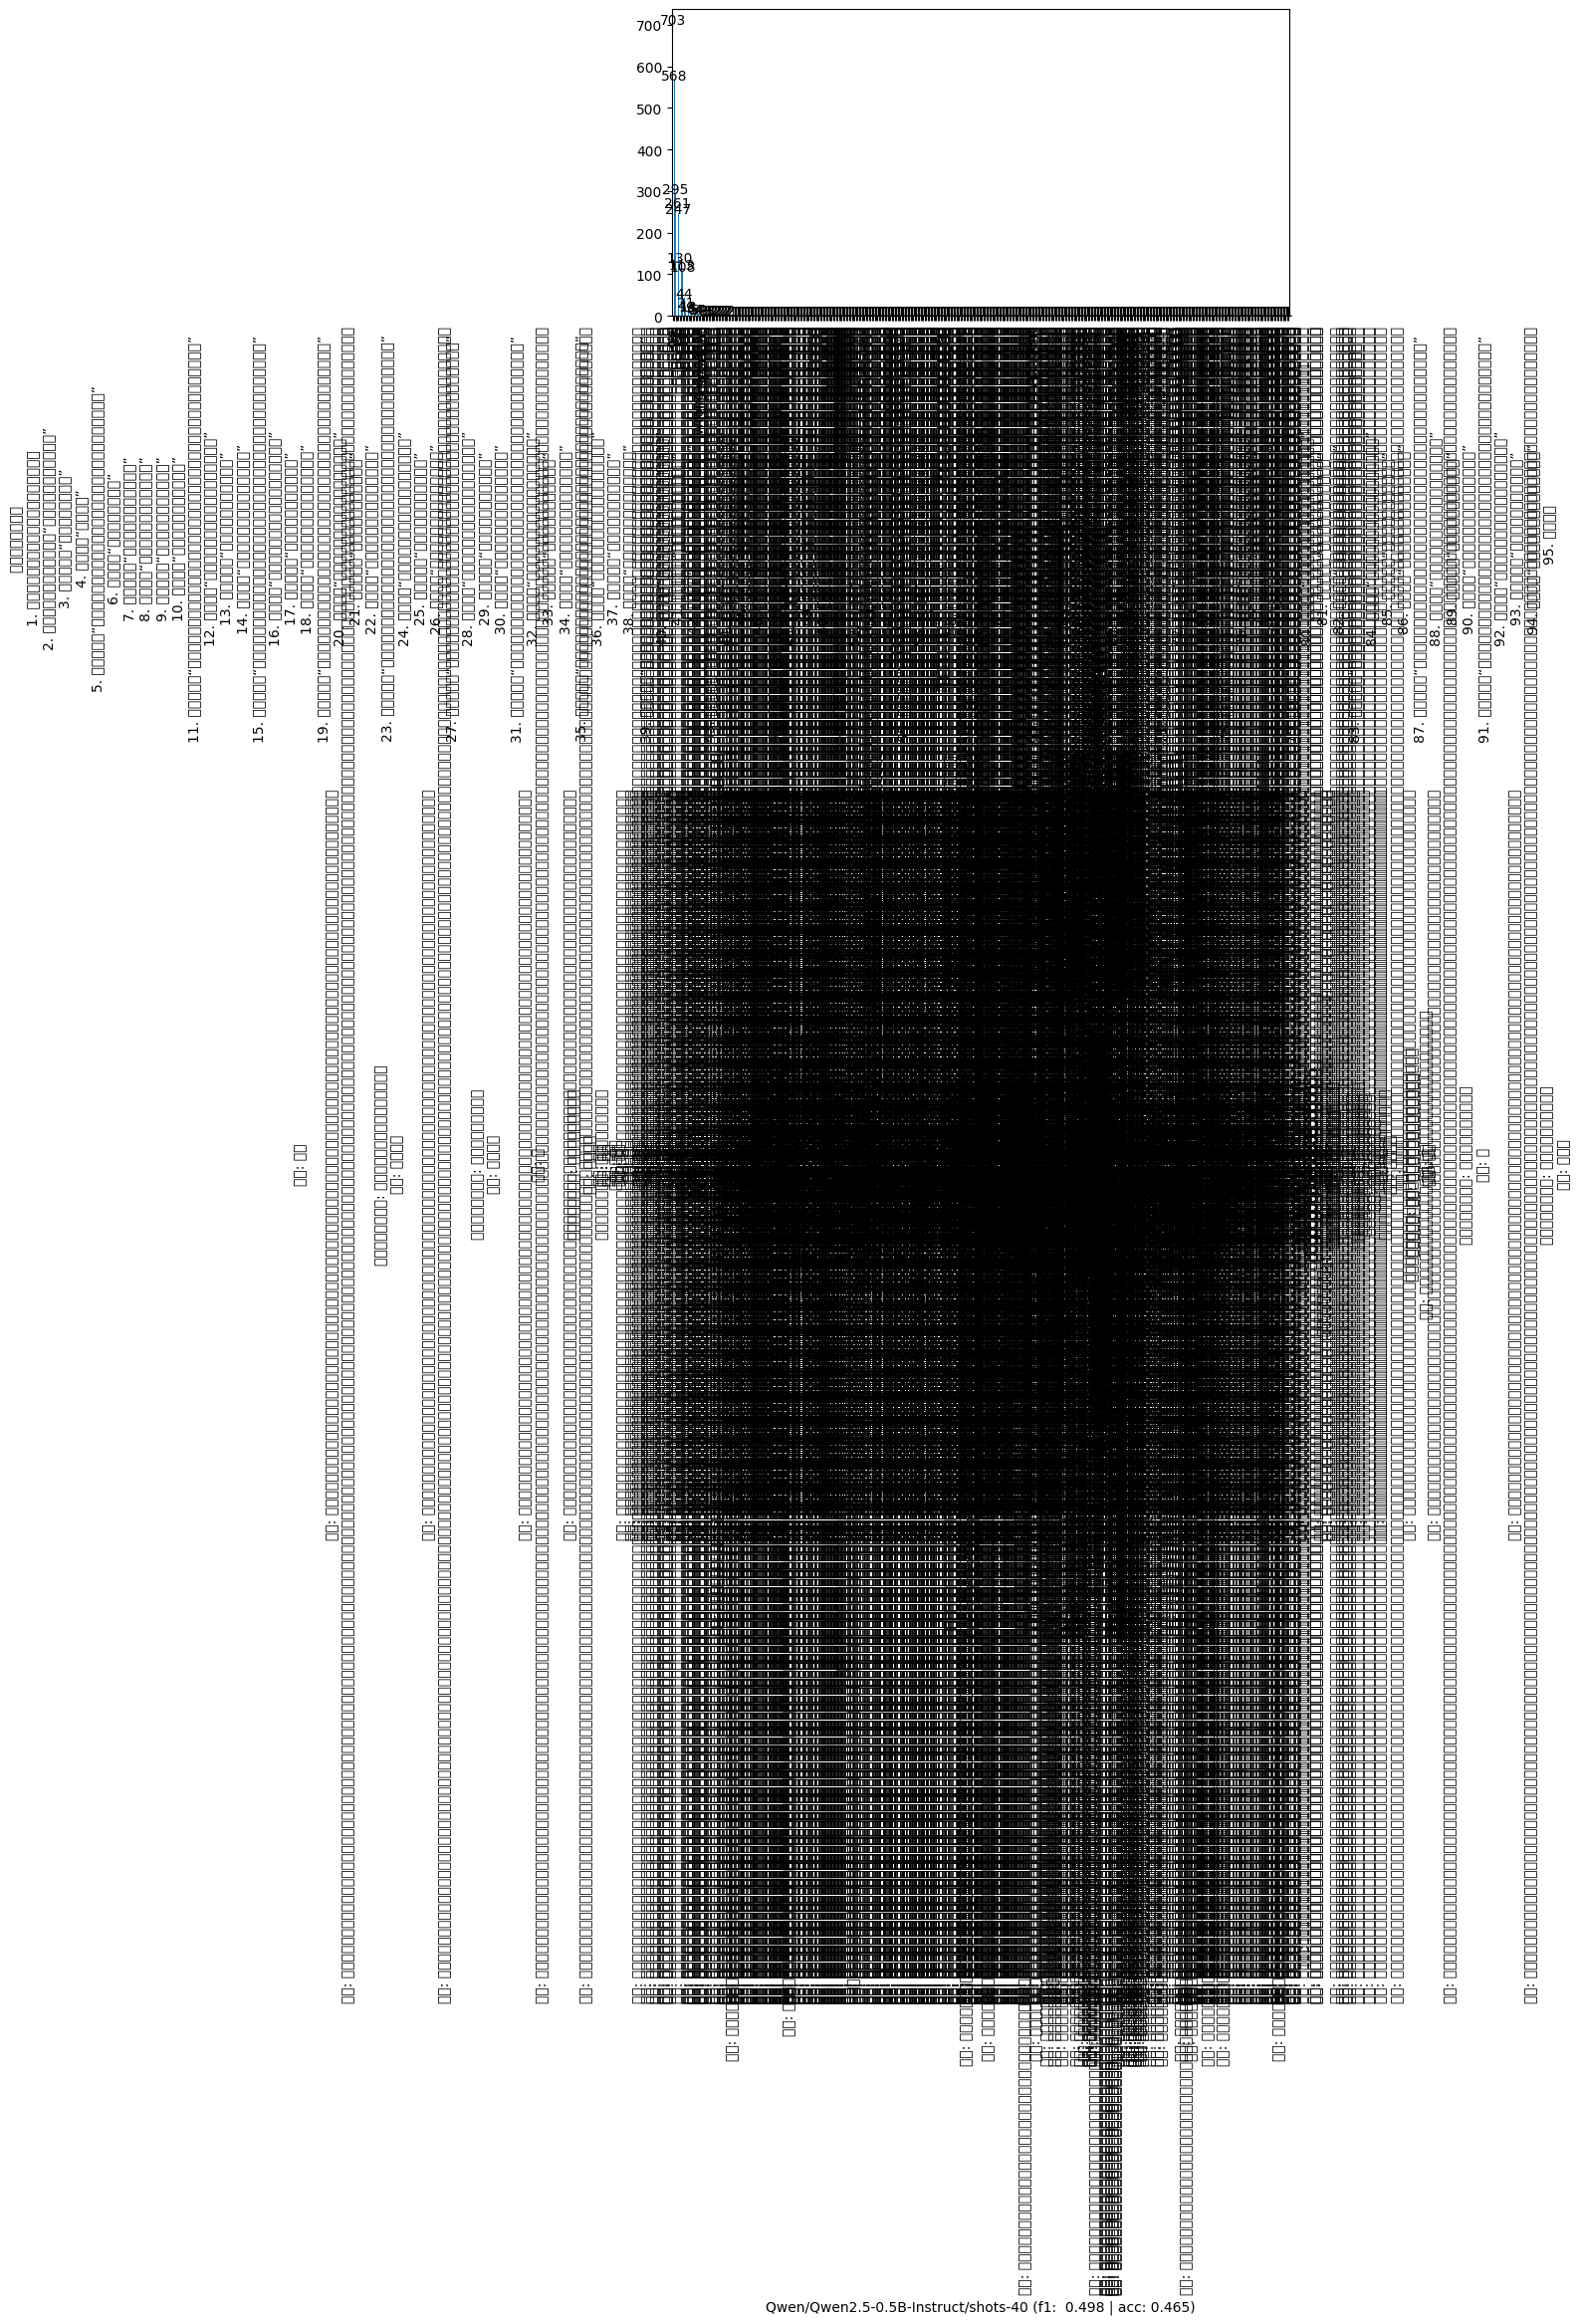

********** Qwen/Qwen2.5-0.5B-Instruct/shots-50 **********
Qwen/Qwen2.5-0.5B-Instruct/shots-50
不是                                                                                                                                                                                                                                                                                                                                                                                                      617
回答: 是                                                                                                                                                                                                                                                                                                                                                                                                   494
回答: 不是                                                                                                            

/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31572 (\N{CJK UNIFIED IDEOGRAPH-7B54}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

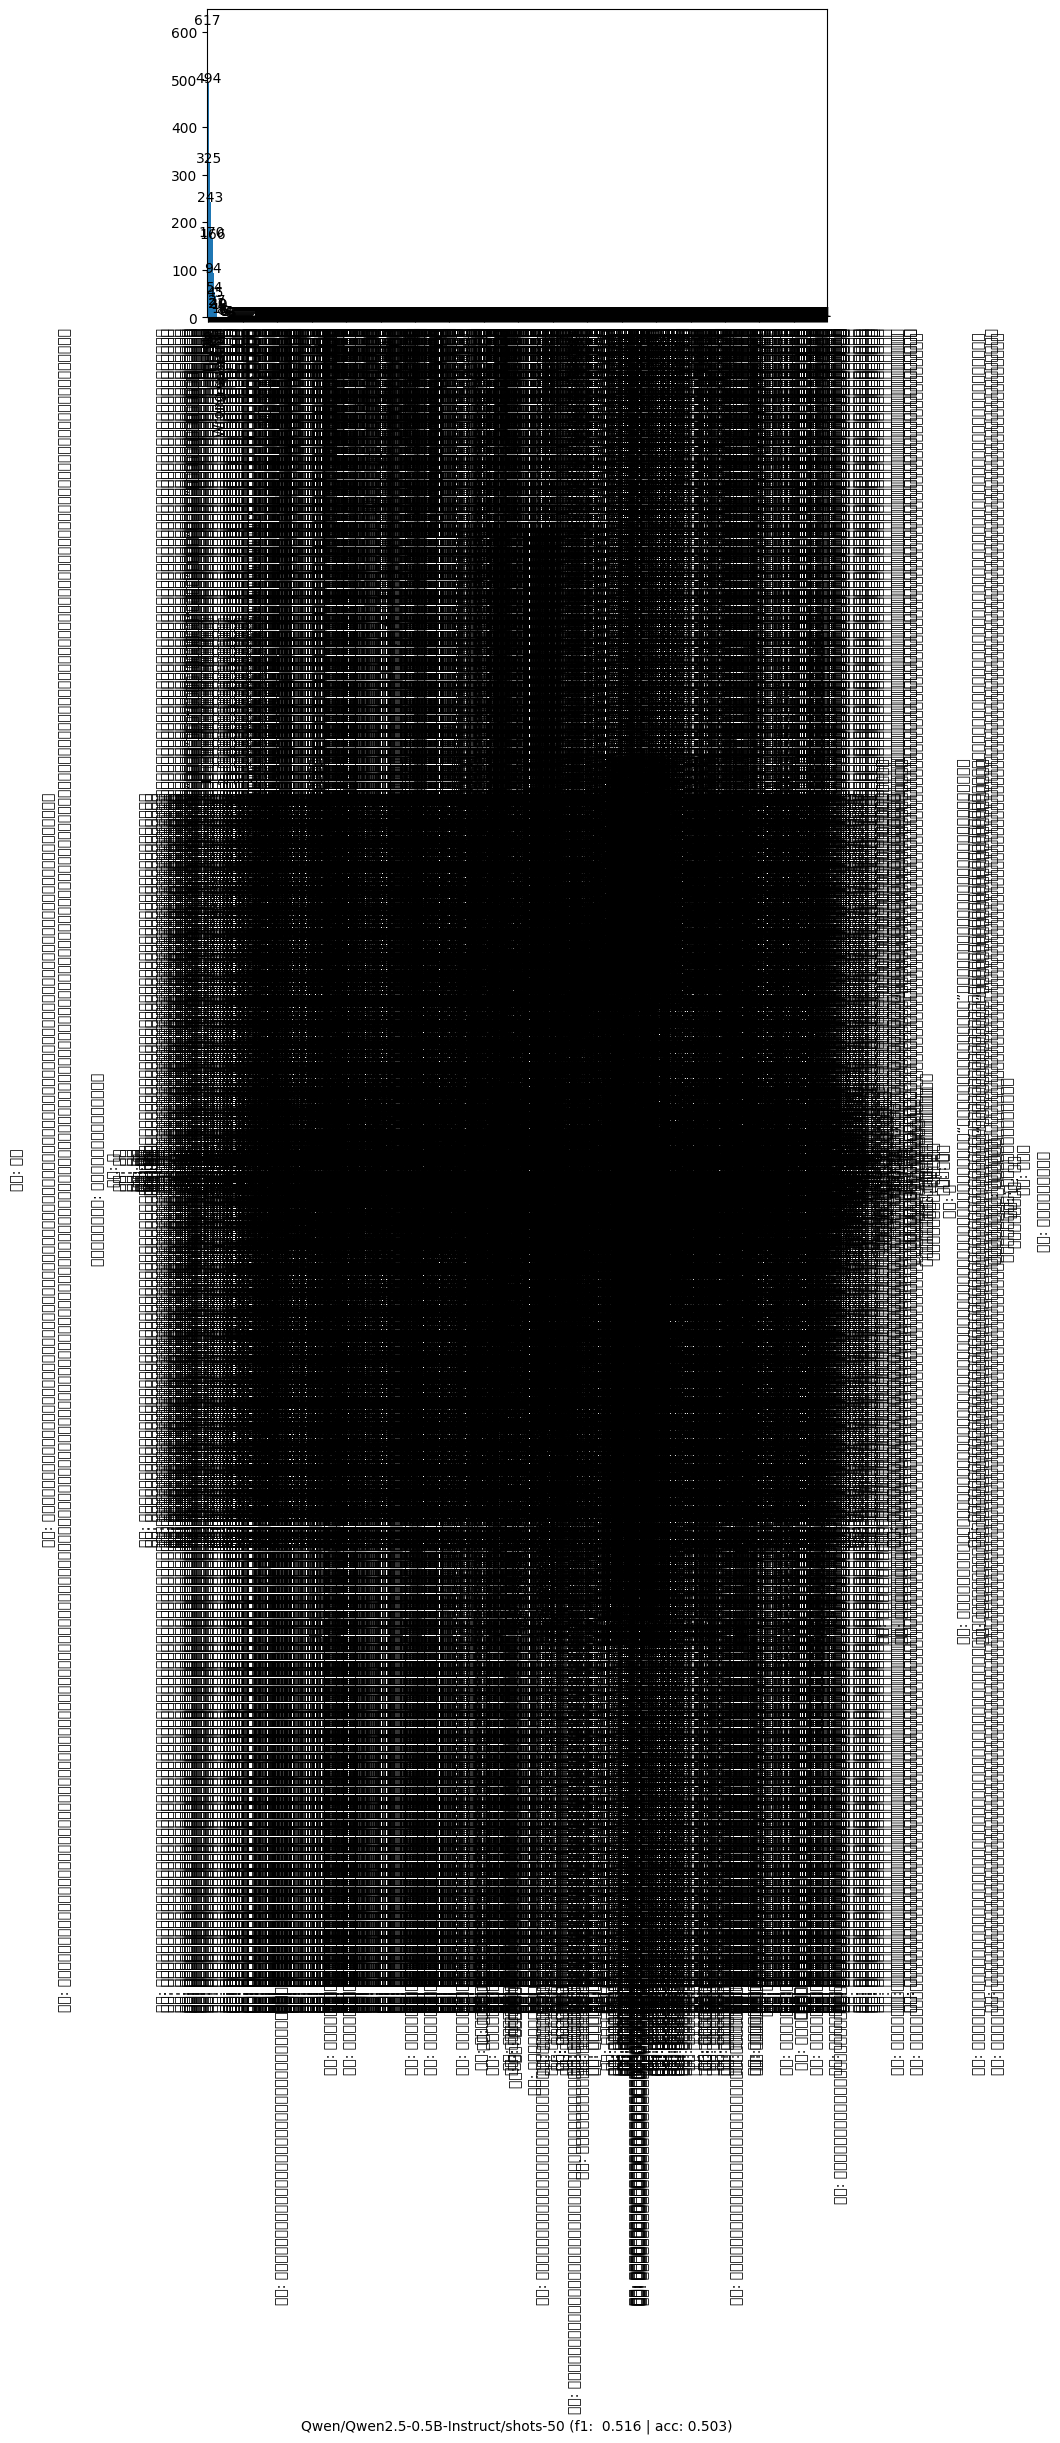

In [46]:
for col, f1, accuracy in zip(
    df.columns[16:], perf_df_shots["f1"].to_list(), perf_df_shots["accuracy"].to_list()
):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(
        df,
        col,
        title=f"{col} (f1: {f1: .3f} | acc: {accuracy:.3f})",
    )

********** Qwen/Qwen2.5-0.5B-Instruct/checkpoint-210_torch.float16_lf **********
Qwen/Qwen2.5-0.5B-Instruct/checkpoint-210_torch.float16_lf
不是      1707
是        630
不重要      551
问法错误      91
回答正确      21
Name: count, dtype: int64


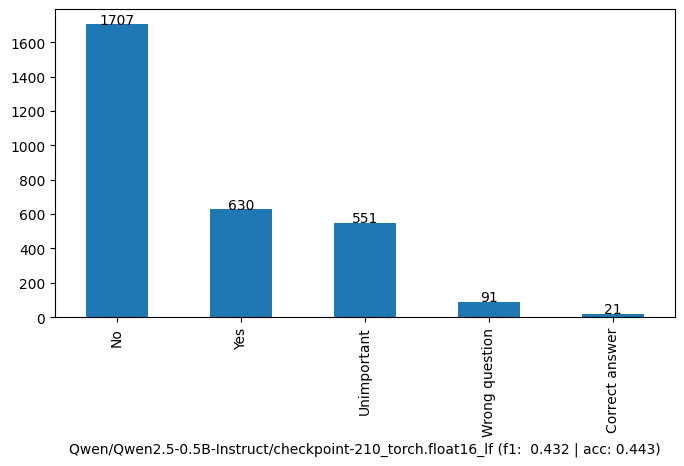

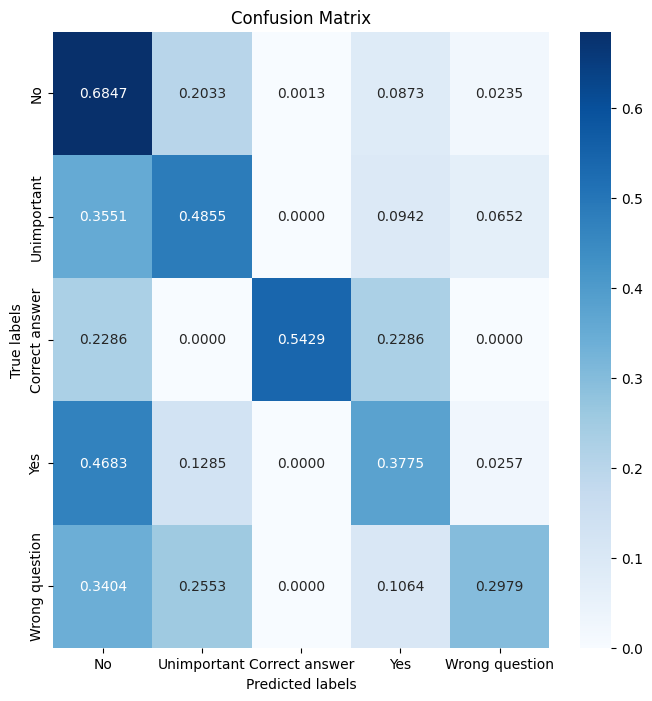

********** Qwen/Qwen2.5-0.5B-Instruct/checkpoint-245_torch.float16_lf **********
Qwen/Qwen2.5-0.5B-Instruct/checkpoint-245_torch.float16_lf
不是      1521
是        907
不重要      503
问法错误      48
回答正确      21
Name: count, dtype: int64


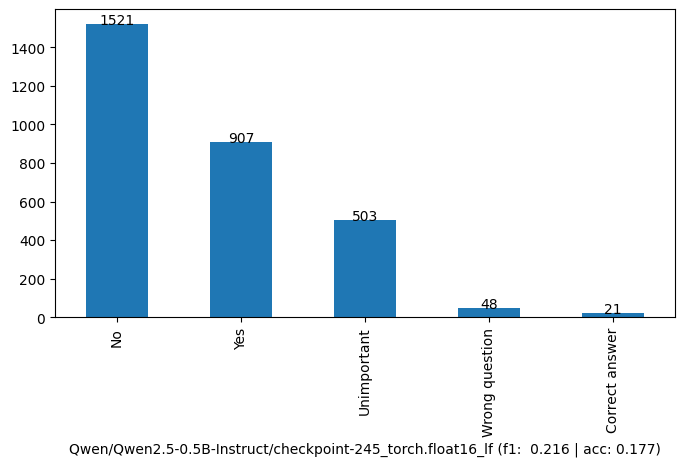

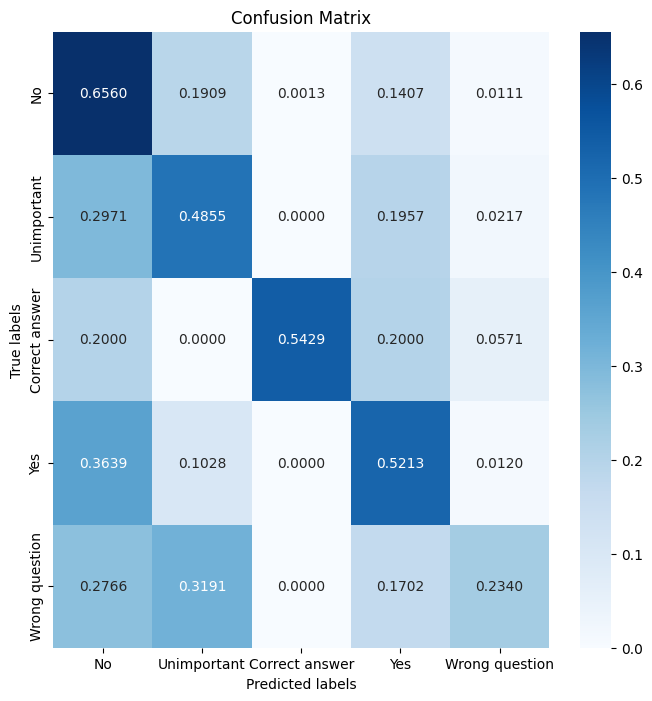

********** Qwen/Qwen2.5-0.5B-Instruct/checkpoint-280_torch.float16_lf **********
Qwen/Qwen2.5-0.5B-Instruct/checkpoint-280_torch.float16_lf
不是      1453
不重要      728
是        689
问法错误     112
回答正确      18
Name: count, dtype: int64


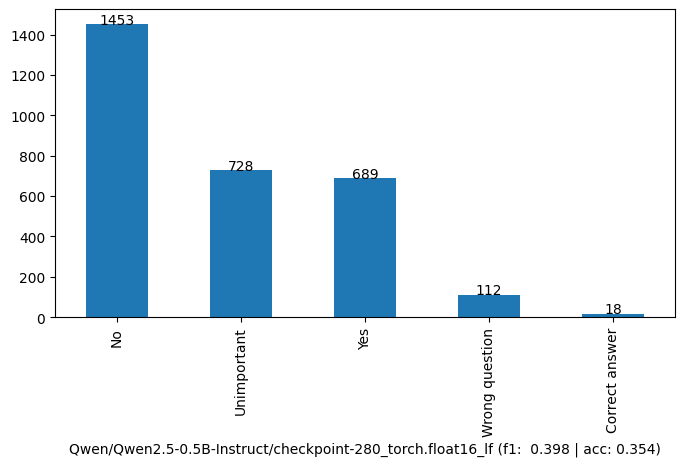

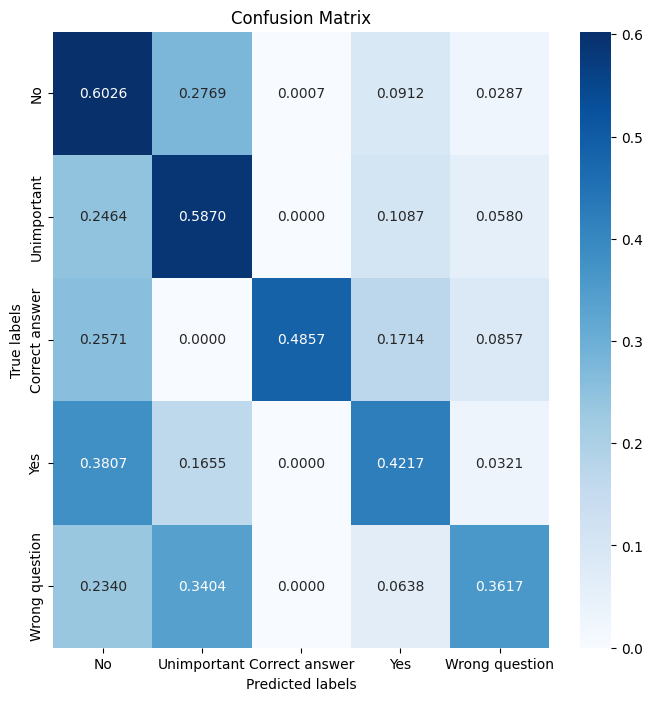

********** Qwen/Qwen2.5-0.5B-Instruct/checkpoint-315_torch.float16_lf **********
Qwen/Qwen2.5-0.5B-Instruct/checkpoint-315_torch.float16_lf
不是      1506
不重要      751
是        633
问法错误      88
回答正确      22
Name: count, dtype: int64


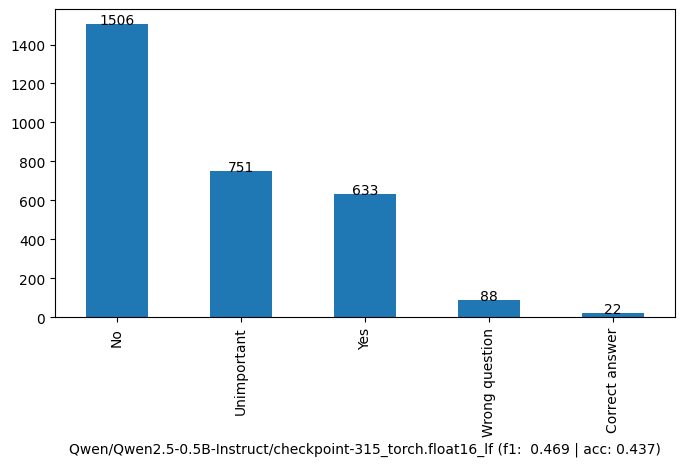

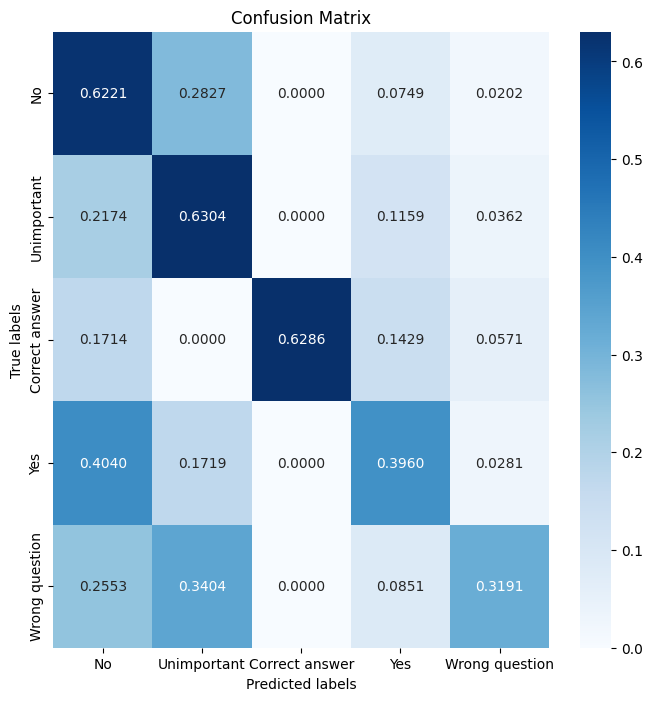

********** Qwen/Qwen2.5-0.5B-Instruct/checkpoint-350_torch.float16_lf **********
Qwen/Qwen2.5-0.5B-Instruct/checkpoint-350_torch.float16_lf
不是      1439
不重要      808
是        638
问法错误      94
回答正确      21
Name: count, dtype: int64


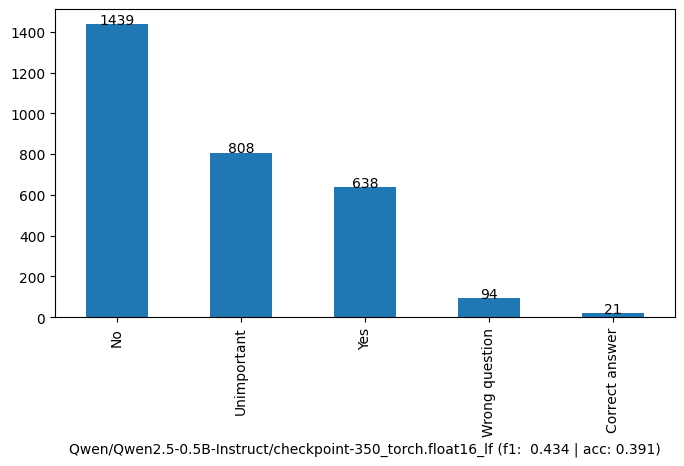

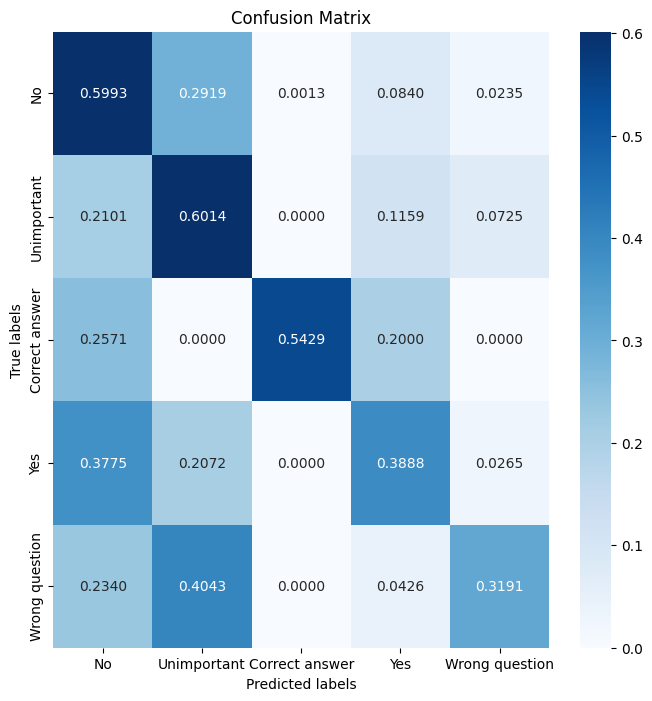

********** Qwen/Qwen2.5-0.5B-Instruct/shots-40 **********
Qwen/Qwen2.5-0.5B-Instruct/shots-40
不是                                                                                                                                                                                                                                                                                                                                                                           703
回答: 是                                                                                                                                                                                                                                                                                                                                                                        568
回答: 不是                                                                                                                                                                  

/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31572 (\N{CJK UNIFIED IDEOGRAPH-7B54}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38169 (\N{CJK UNIFIED IDEOGRAPH-9519}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35823 (\N{CJK UNIFIED IDEOGRAPH-8BEF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

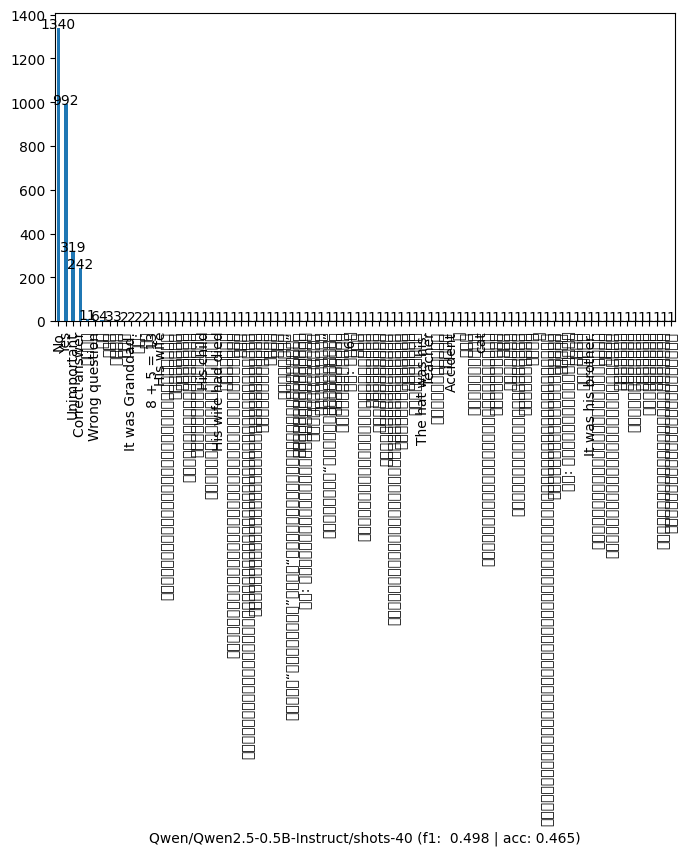

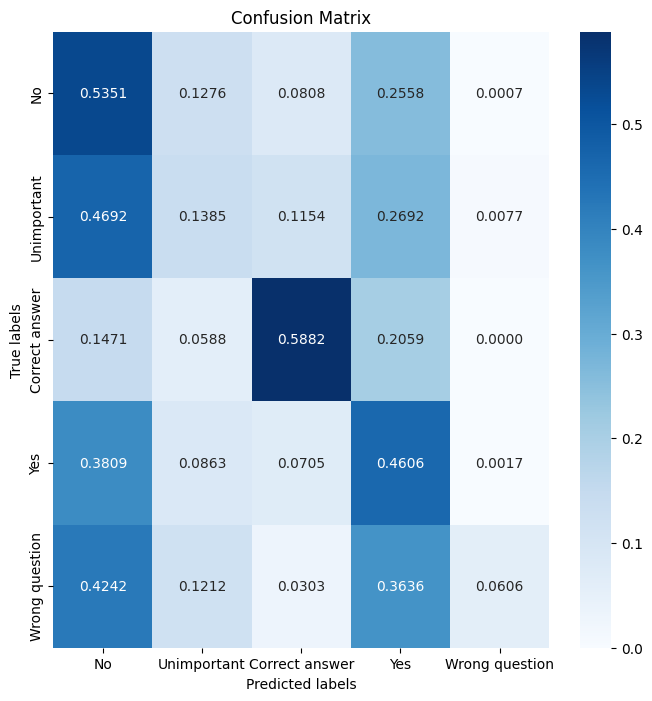

********** Qwen/Qwen2.5-0.5B-Instruct/shots-50 **********
Qwen/Qwen2.5-0.5B-Instruct/shots-50
不是                                                                                                                                                                                                                                                                                                                                                                                                      617
回答: 是                                                                                                                                                                                                                                                                                                                                                                                                   494
回答: 不是                                                                                                            

/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31572 (\N{CJK UNIFIED IDEOGRAPH-7B54}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38169 (\N{CJK UNIFIED IDEOGRAPH-9519}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35823 (\N{CJK UNIFIED IDEOGRAPH-8BEF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

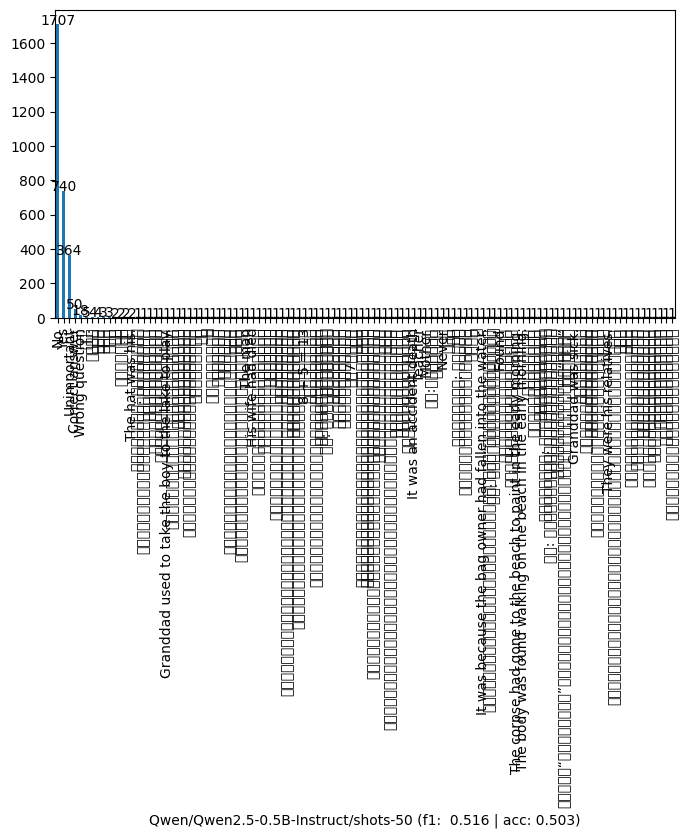

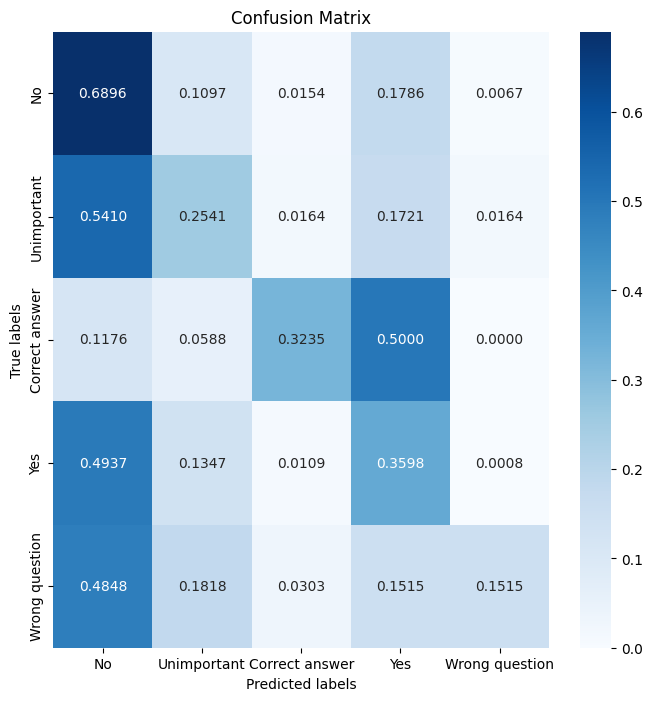

In [47]:
for col, f1, accuracy in zip(
    df.columns[16:], perf_df_shots["f1"].to_list(), perf_df_shots["accuracy"].to_list()
):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(
        df,
        col,
        title=f"{col} (f1: {f1: .3f} | acc: {accuracy:.3f})",
        preprocess_func=extract_answer,
    )